# Master AI Diplmoa - Crop Classification Estimation 

# Part 1: Problem Definition

## 1-Introduction

- Crop Classification is an essential for decision makers to estimate the available production of crops specially for the strategic crops, and depending on its accuracy the agriculture policies can be set.
- Machine Learning Techniques will be used in addition to Artificial Neural Network (ANN)
- Future trial will be by applying segmentation on the satellite image using Computer Vision (CV) or image analysis then performing the Classification process 

## 2-Data Description

- in this project I will rely on a sample data provided by Hexagon which is a leading organization in the Remote Sensing field. for further information kindly review this link "https://hexagon.com/"
- the data set is a satellite image of an area in the North Carolina state at the USA
- the images area is almost 6.6 sqKm
- the spatial resolution of the image is 1.0 meter
- the image consists of 4 spectral bands (Channels):
  - Layer 1: Blue
  - Layer 2: Green
  - Layer 3: Red
  - Layer 4:Near Infrared (NIR)
- the radiometric resolution of the image is 8 Bits, i.e. the recorded values range is between 0 and 255

### 2-1 Display the image

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the image
img = plt.imread("land_cover.tif")

In [3]:
# Exploring image inforamtion
print(type(img))
print("---------------")
print(img.shape)
print("---------------")
print(img.ndim)
print("---------------")
print(img.size)
print("---------------")
print(img)

<class 'numpy.ndarray'>
---------------
(2337, 2821, 4)
---------------
3
---------------
26370708
---------------
[[[ 95 117 106 188]
  [108 132 117 195]
  [121 146 127 202]
  ...
  [ 83  93 104 140]
  [ 76  99 105 159]
  [115 135 137 209]]

 [[ 90 114 100 182]
  [ 91 115  99 191]
  [ 91 116  98 201]
  ...
  [ 74  76  90 104]
  [ 66  86  80 115]
  [ 78 106 110 166]]

 [[ 86 111  95 176]
  [103 128 112 188]
  [121 145 128 199]
  ...
  [ 66  73  92 144]
  [ 56  67  50  96]
  [ 47  52  57  98]]

 ...

 [[161 126 129 122]
  [154 131 122 123]
  [147 137 115 123]
  ...
  [ 77  93  84 165]
  [ 96 106  97 189]
  [105 110 100 199]]

 [[156 138 124 124]
  [155 139 123 125]
  [154 139 123 126]
  ...
  [ 76  93  86 196]
  [ 88 107 100 204]
  [ 96 112 104 202]]

 [[131 120  98 107]
  [136 121 104 108]
  [141 122 110 109]
  ...
  [ 76  93  87 167]
  [ 81 108 102 188]
  [ 87 114 107 200]]]


*Displaying the image in true color mode (Red, Green, Blue) is useful for exploring the image features in natural color where crops appears in green*

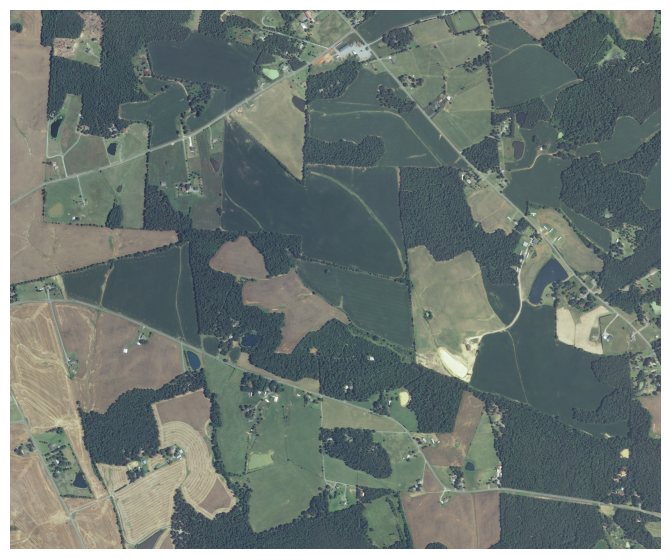

In [4]:
# Displaying the image in true color mode (Red, Green, Blue)
plt.figure(figsize=(10,7))
plt.imshow(img[:,:,:3],aspect="equal")
plt.axis("off")
plt.show()

*Displaying the image in false color mode (NIR, Red, Green) is useful for exploring the image features from the Remote Sensing specialits point of view , crops appears in red color*

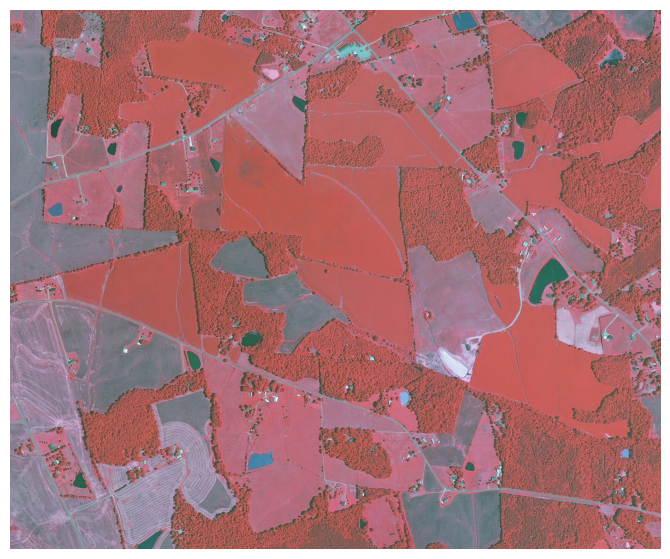

In [5]:
# Displaying the image in False color mode (NIR, Red, Green)
plt.figure(figsize=(10,7))
plt.imshow(img[:,:,-1:0:-1],aspect="equal")
plt.axis("off")
plt.show()

- Training sample data has been gathered in this area as illustrated in the image below
  *Note: this image was produced by ERDAS IMAGINE software which an overlay of the collected points over the image*

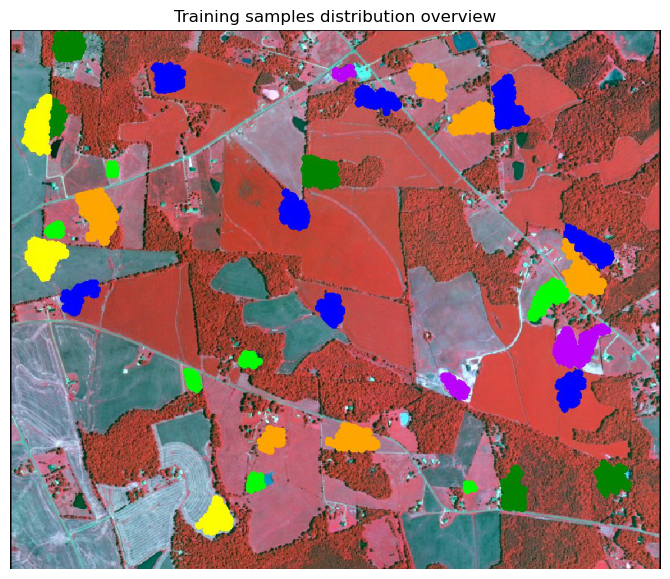

In [6]:
img_overview = plt.imread("overview.jpg")
plt.figure(figsize=(10,7))
plt.imshow(img_overview,aspect="equal")
plt.title("Training samples distribution overview")
plt.axis("off")
plt.show()

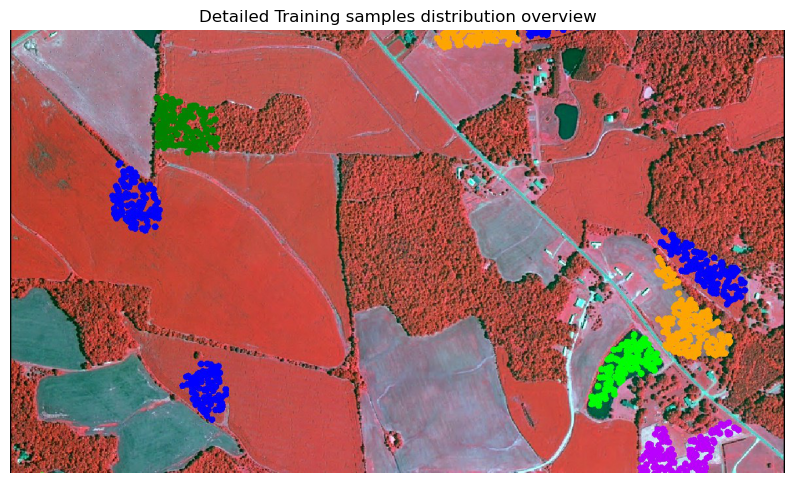

In [7]:
img_overview_subset = plt.imread("overview_subset.jpg")
plt.figure(figsize=(10,7))
plt.imshow(img_overview_subset,aspect="equal")
plt.title("Detailed Training samples distribution overview")
plt.axis("off")
plt.show()

- the reflected enegery recording by the satellite images are collected and recorded with each point as its attributes

# Part 2 : Data Preparation

## 1- Reading Training Samples

In [8]:
df = pd.read_csv("Training_Samples.csv")

In [9]:
df

Class    Name  Blue  Green  Red  InfraRed            X            Y
0         1    corn    78     98   97       195  548167.6460  3861160.746
1         1    corn    78     98  100       194  548080.9940  3861241.200
2         1    corn    79     97   99       193  548105.8906  3861201.299
3         1    corn    82    100  101       191  548100.2318  3861288.683
4         1    corn    80     97   99       189  548062.7699  3861251.465
...     ...     ...   ...    ...  ...       ...          ...          ...
3473      2  forest    68     73   78       177  548132.4581  3859474.077
3474      2  forest    61     88   99       145  548141.6796  3859526.613
3475      2  forest    52     72   71       146  548135.1257  3859510.573
3476      2  forest    81    118  112       190  548083.6656  3859556.103
3477      2  forest    74     83   93       149  548107.3400  3859548.748

[3478 rows x 8 columns]

- the **Class** Column represents the land cover features, for instance the code number 1 is equivilant to corn
- the **Name** Column represents the crop name
- the **Blue** Column represents the reflected energy corresponding to the blue wavelength (channel) in the light spectrum
- the **Green** Column represents the reflected energy corresponding to the green wavelength (channel) in the light spectrum
- the **Red** Column represents the reflected energy corresponding to the red wavelength (channel) in the light spectrum
- the **InfraRed** Column represents the reflected energy corresponding to the near infra-red wavelength (channel) in the light spectrum

In [10]:
# the available codes in the training samples
df['Class'].unique()

array([1, 4, 5, 6, 2, 3], dtype=int64)

In [11]:
# the available crop names in the training samples
df['Name'].unique()

array(['corn', 'wheat', 'barren', 'water', 'forest', 'fallow'],
      dtype=object)

In [12]:
# the number of available classes is
df['Class'].nunique()

6

In [13]:
# the total number of training samples 
df.shape[0]

3478

In [14]:
# the count of training samples per crop
d = df['Name'].value_counts()
d

corn      986
wheat     916
forest    563
fallow    452
water     282
barren    279
Name: Name, dtype: int64

## 2- Drop Columns

In [15]:
df = df.drop(["Name","X","Y"],axis=1)

In [16]:
df

Class  Blue  Green  Red  InfraRed
0         1    78     98   97       195
1         1    78     98  100       194
2         1    79     97   99       193
3         1    82    100  101       191
4         1    80     97   99       189
...     ...   ...    ...  ...       ...
3473      2    68     73   78       177
3474      2    61     88   99       145
3475      2    52     72   71       146
3476      2    81    118  112       190
3477      2    74     83   93       149

[3478 rows x 5 columns]

## 3- Rearranging Columns

In [17]:
# the target column is the "class" which represent the class Code
cols = df.columns.tolist()
cols.append(cols.pop(0))
df = df[cols]
df

Blue  Green  Red  InfraRed  Class
0       78     98   97       195      1
1       78     98  100       194      1
2       79     97   99       193      1
3       82    100  101       191      1
4       80     97   99       189      1
...    ...    ...  ...       ...    ...
3473    68     73   78       177      2
3474    61     88   99       145      2
3475    52     72   71       146      2
3476    81    118  112       190      2
3477    74     83   93       149      2

[3478 rows x 5 columns]

## 4- Check for Null Values and Columns Datatypes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Blue      3478 non-null   int64
 1   Green     3478 non-null   int64
 2   Red       3478 non-null   int64
 3   InfraRed  3478 non-null   int64
 4   Class     3478 non-null   int64
dtypes: int64(5)
memory usage: 136.0 KB


In [19]:
# Columns Analysis Function is used to computes the current condition of the columns data type, unique values, and null 
def ColumnsAnalysis ():    
    df_columns_analysis = pd.DataFrame([df.dtypes,df.nunique(),df.isnull().sum(), df.isnull().sum() / df.shape[0]], index=["data_type","n_unique","null_count","null_ratio"])
    return df_columns_analysis
ColumnsAnalysis()

Blue  Green    Red InfraRed  Class
data_type   int64  int64  int64    int64  int64
n_unique      195    199    188      198      6
null_count      0      0      0        0      0
null_ratio    0.0    0.0    0.0      0.0    0.0

## 5- Check for duplicates

In [20]:
df.duplicated().sum()

109

In [21]:
# drop dublicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 6- Studying Training Samples Statistics

In [22]:
df.describe()

Blue        Green          Red     InfraRed        Class
count  3369.000000  3369.000000  3369.000000  3369.000000  3369.000000
mean    107.363609   118.407539   112.335411   160.682102     2.964678
std      42.246181    37.257113    28.331308    43.361934     1.605439
min      23.000000    15.000000    14.000000     7.000000     1.000000
25%      74.000000    91.000000    96.000000   133.000000     1.000000
50%      98.000000   117.000000   108.000000   177.000000     3.000000
75%     136.000000   138.000000   123.000000   191.000000     4.000000
max     243.000000   254.000000   246.000000   244.000000     6.000000

**Notes:**
- *all minimum and maximum values seems good and ther is no odd values susch as negative*
- *to save hardware resources it's better to convert the data type to unsigned 8 bits*

In [23]:
# changing the data type to unsigned 8 bits
for column in df.columns:
    df[column] = df[column].astype("uint8")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 3477
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Blue      3369 non-null   uint8
 1   Green     3369 non-null   uint8
 2   Red       3369 non-null   uint8
 3   InfraRed  3369 non-null   uint8
 4   Class     3369 non-null   uint8
dtypes: uint8(5)
memory usage: 42.8 KB


In [24]:
df.describe()

Blue        Green          Red     InfraRed        Class
count  3369.000000  3369.000000  3369.000000  3369.000000  3369.000000
mean    107.363609   118.407539   112.335411   160.682102     2.964678
std      42.246181    37.257113    28.331308    43.361934     1.605439
min      23.000000    15.000000    14.000000     7.000000     1.000000
25%      74.000000    91.000000    96.000000   133.000000     1.000000
50%      98.000000   117.000000   108.000000   177.000000     3.000000
75%     136.000000   138.000000   123.000000   191.000000     4.000000
max     243.000000   254.000000   246.000000   244.000000     6.000000

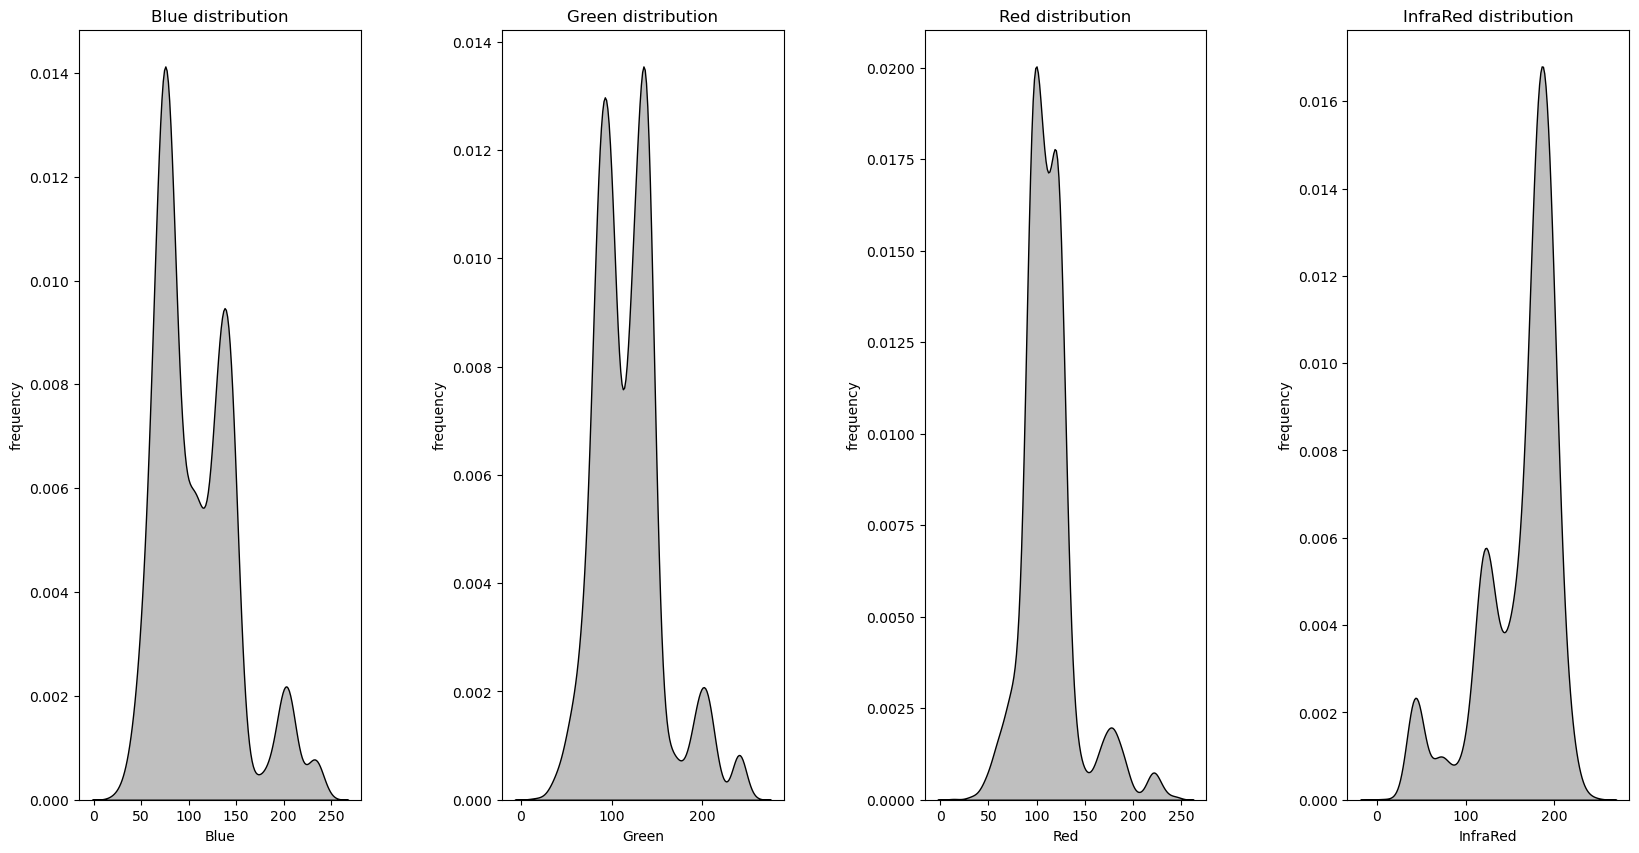

In [25]:
# Plot diagrams: data distribution

plt.figure(figsize= (20,10))
for i,column in enumerate(df.columns[:-1]):
    
    plt.subplot(1,4,i+1)
    sns.kdeplot(df[column], color="black", fill=True)    
    
    plt.title(column + " distribution")
    plt.xlabel(column)
    plt.ylabel("frequency")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

*the charts above represent a statistical over view of the whole image*
- from the charts above it's clear that the distribution is by modal normal distribution
- the clear peaks which can be counted from the chart are 4, this means that there may be some overlap in the collected signature because we have 6 classes

In [26]:
df

Blue  Green  Red  InfraRed  Class
0       78     98   97       195      1
1       78     98  100       194      1
2       79     97   99       193      1
3       82    100  101       191      1
4       80     97   99       189      1
...    ...    ...  ...       ...    ...
3473    68     73   78       177      2
3474    61     88   99       145      2
3475    52     72   71       146      2
3476    81    118  112       190      2
3477    74     83   93       149      2

[3369 rows x 5 columns]

In [27]:
df_class1 = df[df['Class']==1]
df_class1

Blue  Green  Red  InfraRed  Class
0       78     98   97       195      1
1       78     98  100       194      1
2       79     97   99       193      1
3       82    100  101       191      1
4       80     97   99       189      1
...    ...    ...  ...       ...    ...
2908    73     92   94       201      1
2909    70     92   96       201      1
2910    71     91   95       201      1
2912    76     93   97       202      1
2914    72     91   96       197      1

[917 rows x 5 columns]

In [28]:
class_values = df['Class'].unique().tolist()   
class_values.sort()
class_values

[1, 2, 3, 4, 5, 6]

- *the following charts will study the training sample per class (crop) to be sure of the quality of the training samples*

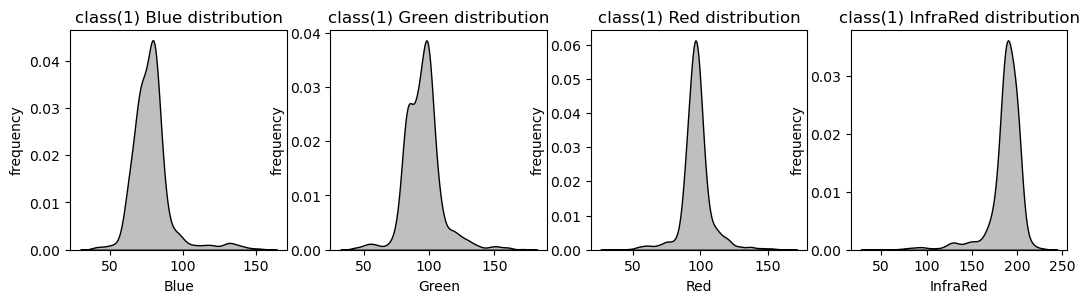

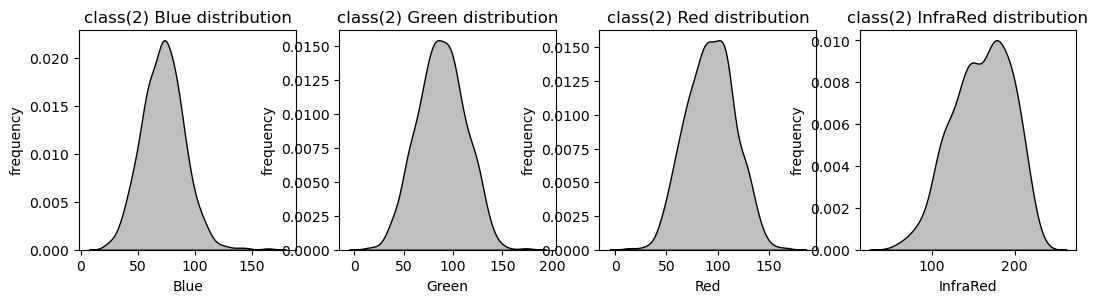

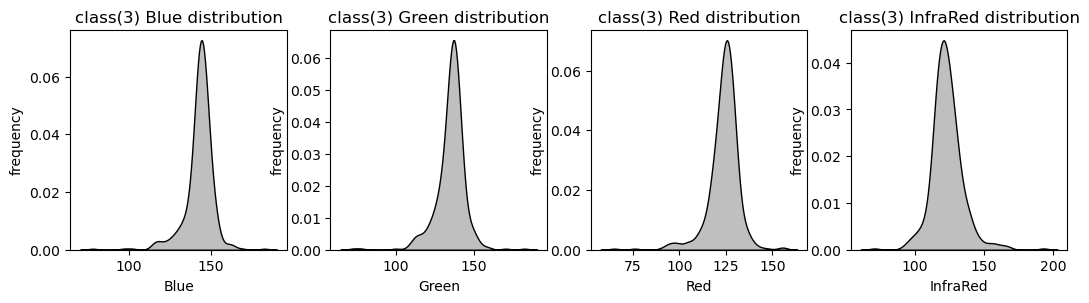

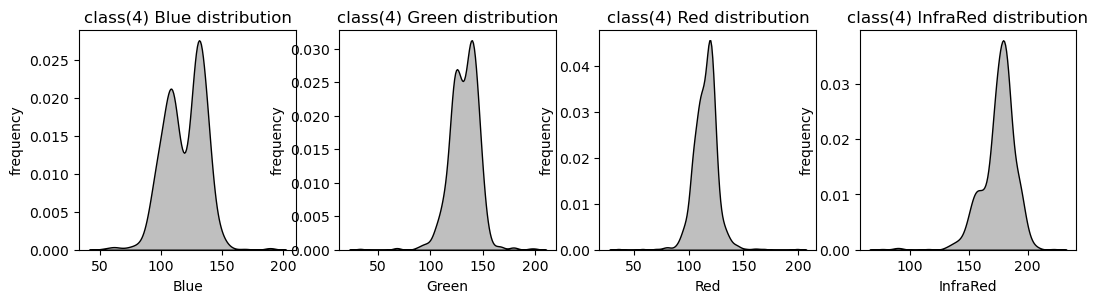

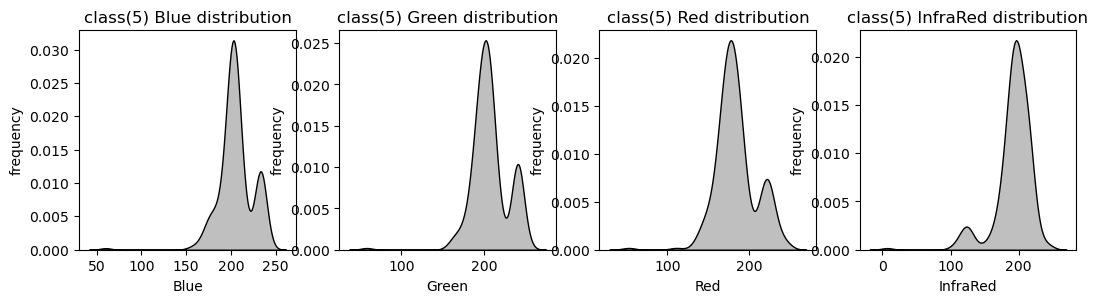

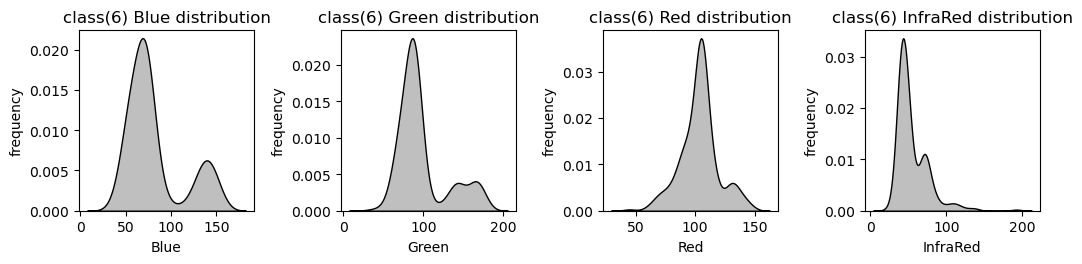

In [29]:
# Plot diagrams: data distribution per class per Channel
for j in class_values:
    df_class = df[df['Class']==j]
    plt.figure(figsize= (80,20))
    for i,column in enumerate(df_class.columns[:-1]):

        plt.subplot(6,24,i+1)
        sns.kdeplot(df_class[column], color="black", fill=True)    

        plt.title("class(" + str(j) + ") " +column + " distribution")
        plt.xlabel(column)
        plt.ylabel("frequency")
    
plt.subplots_adjust(hspace = 0.50, wspace = 0.5)    
plt.show()

***Note** the good training samples must satisfy the folloiwng*
- narrow distribution
- one model dsitribution (one peak)
- no tails (almost represents outliers)
*from the charts above we can deduce the following:*
- some training samples overlaped by others and this may be due to field collection errors
- we have to study and remove the outliers 


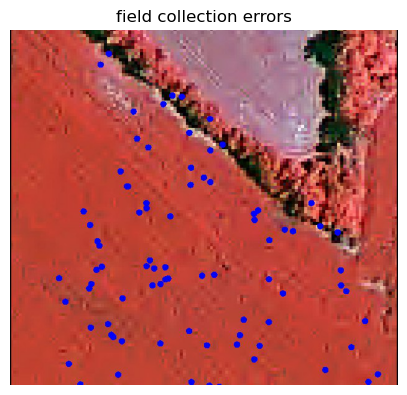

In [30]:
img_tsamples = plt.imread("training_samples_error.jpg")
plt.figure(figsize=(5,5))
plt.imshow(img_tsamples,aspect="equal")
plt.title("field collection errors")
plt.axis("off")
plt.show()

*from the figure above we can deduce the following:*
- some training samples have been collected over trees
- some training samples have been collected over shadows

*the points avove descripes the outliers existance reasons*

## 7- Check for Ouliers

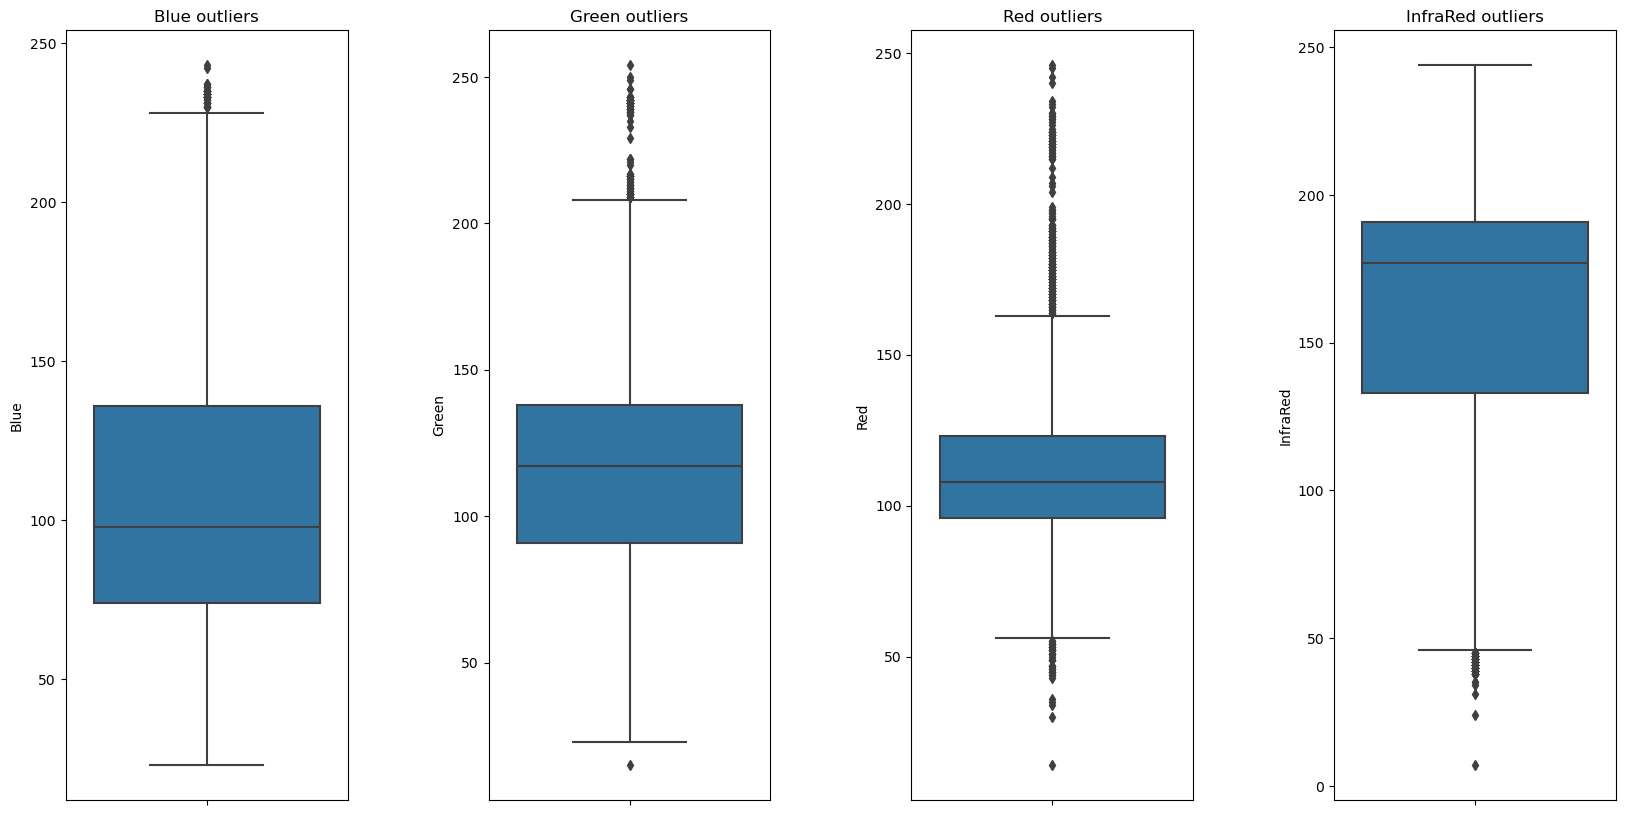

In [31]:
plt.figure(figsize=(20,10))

for i,column in enumerate (df.columns[:-1]):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=column, data=df)
    plt.title(column + " outliers")

plt.subplots_adjust(hspace= 0.50 , wspace=0.5)
plt.show()

*the charts avove is a general outlier for all classes which is not useful in the analysis due to the nature of spectral analysis for the energy reflected from the ground to the satellite sensor, therfore a study per class per channel msut be performed as in the charts below*

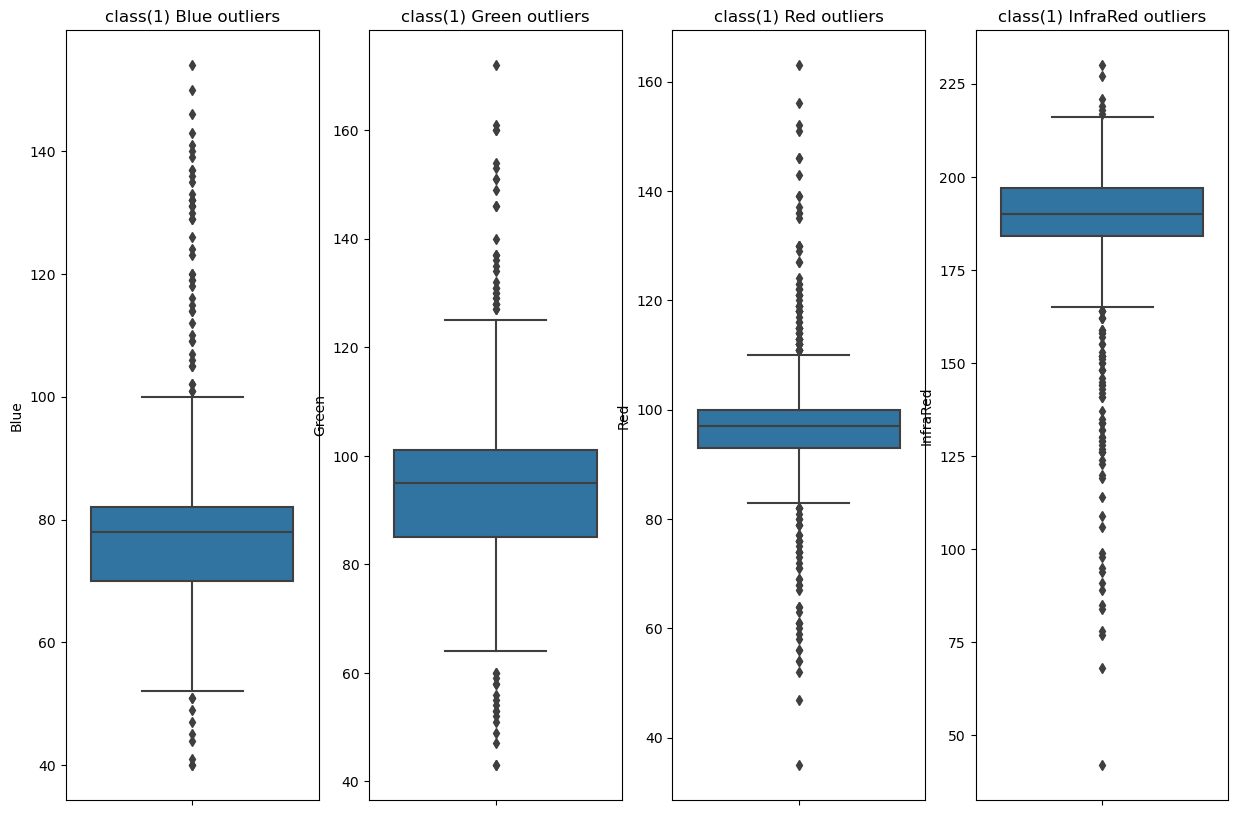

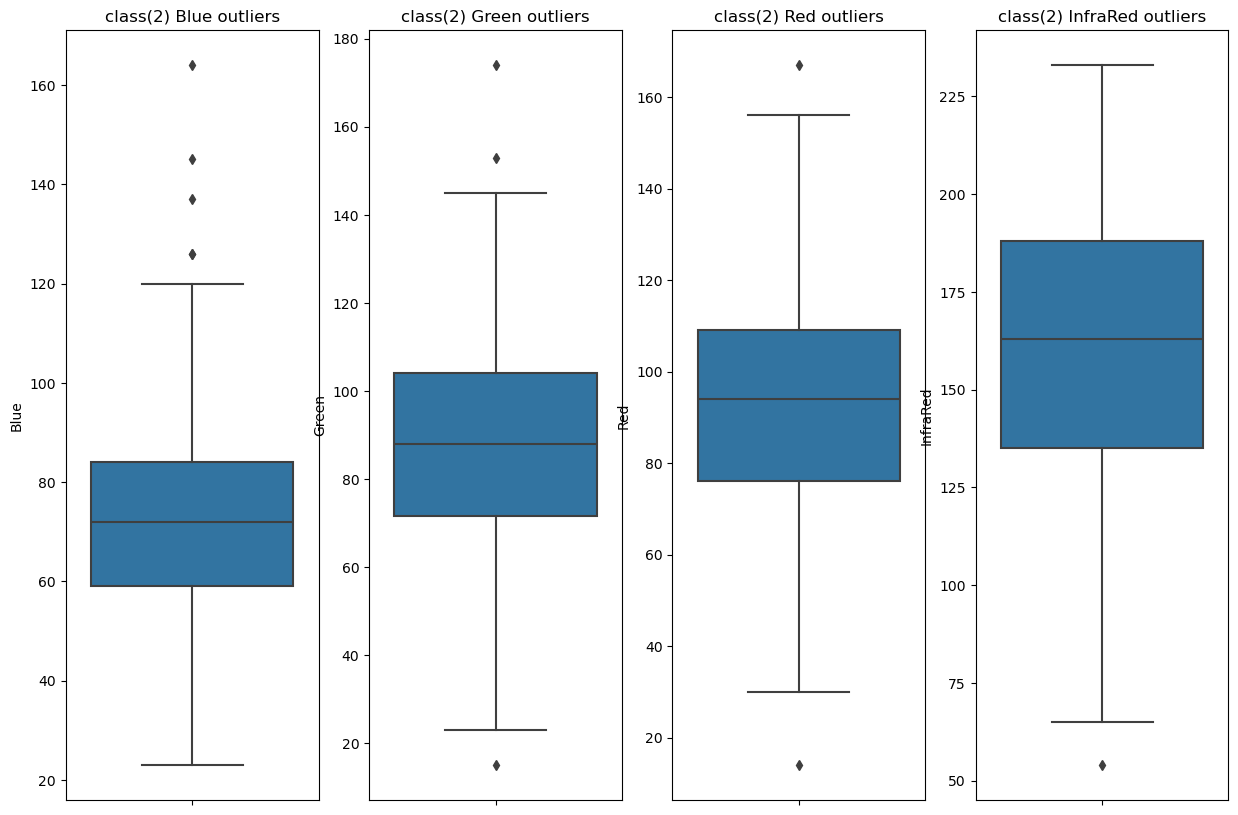

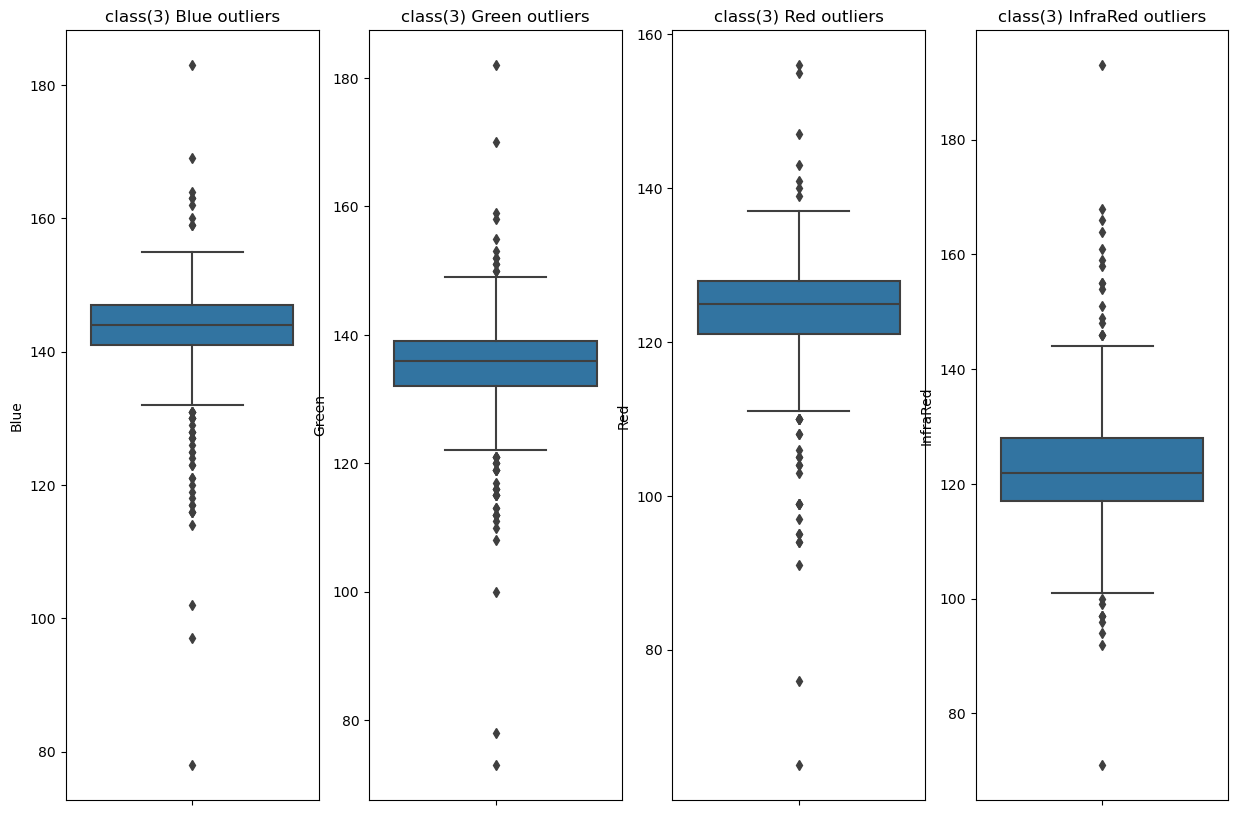

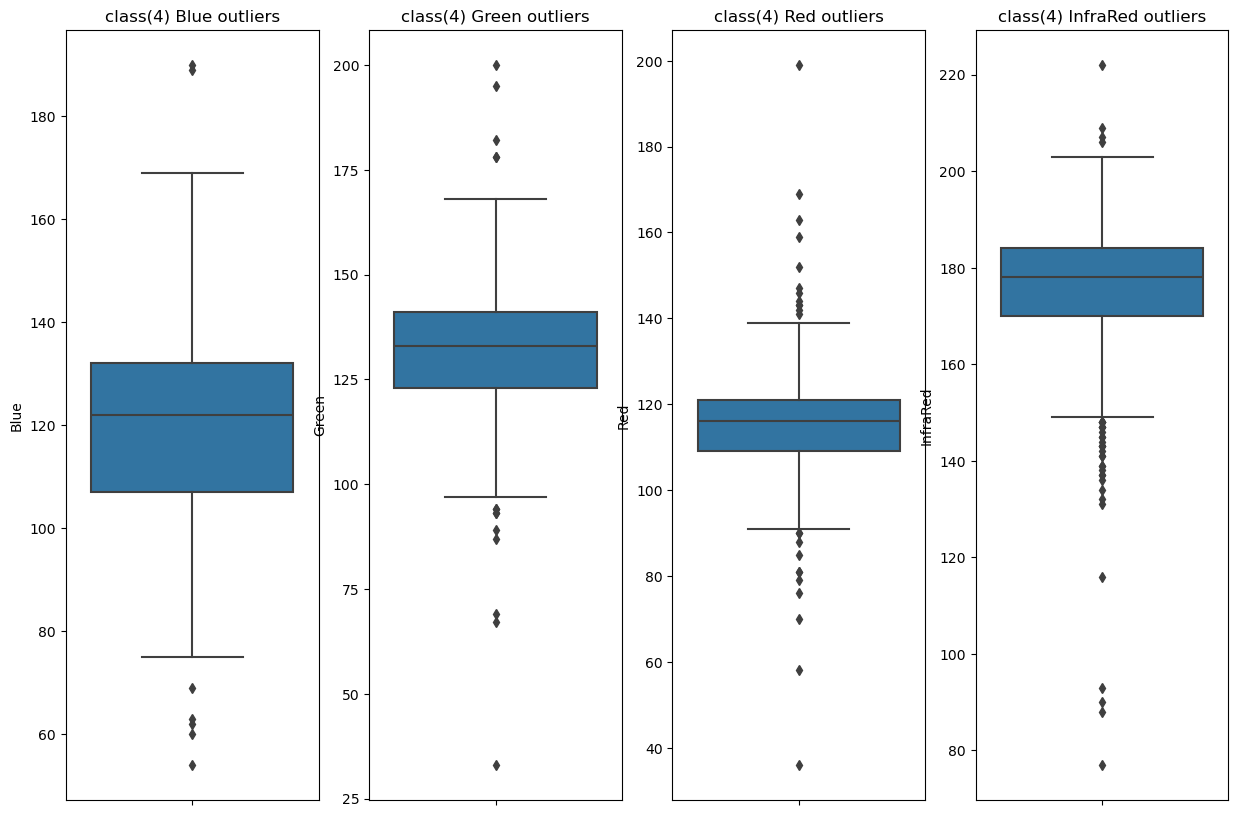

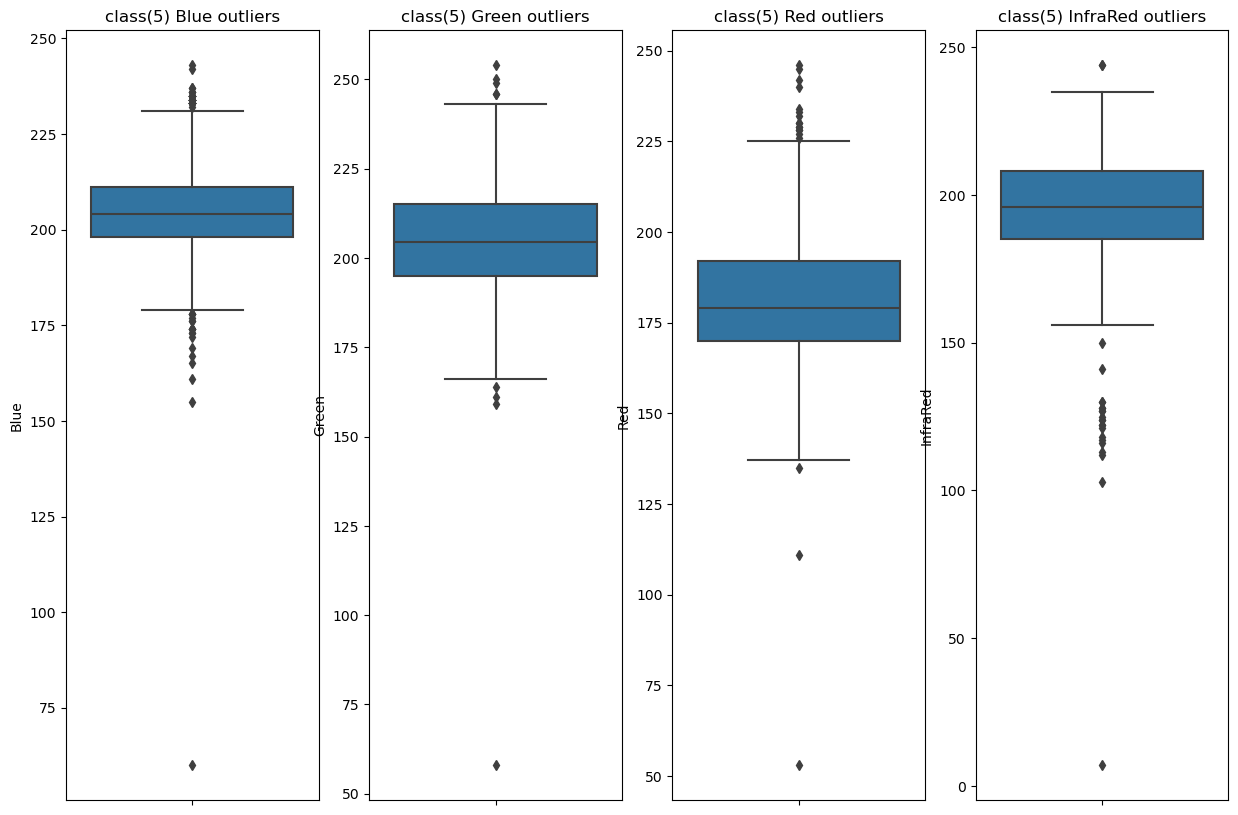

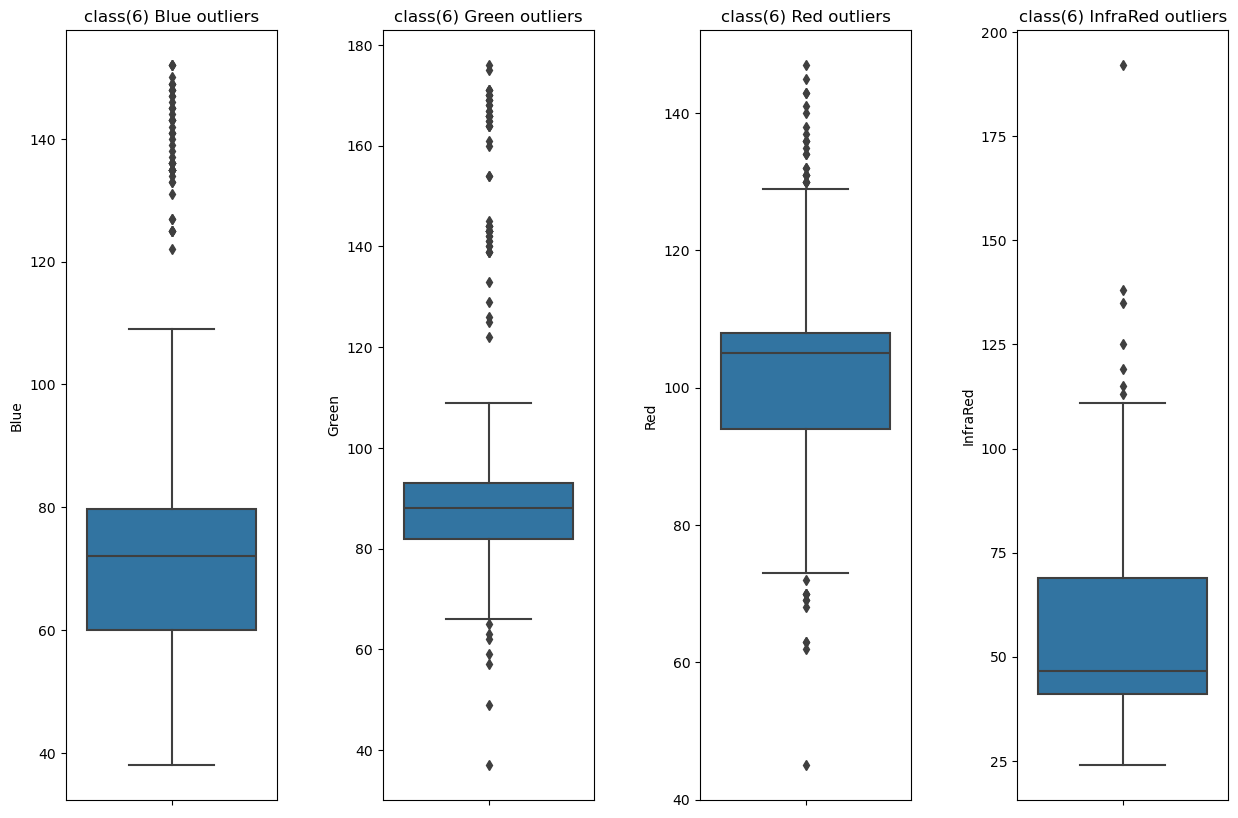

In [32]:
for j in class_values:
    df_class = df[df['Class']==j]
    plt.figure(figsize= (15,10))
    for i,column in enumerate (df_class.columns[:-1]):
        plt.subplot(1,4,i+1)
        sns.boxplot(y=column, data=df_class)
        plt.title("class(" + str(j) + ") " + column + " outliers")

plt.subplots_adjust(hspace= 0.50 , wspace=0.5)
plt.show()

In [33]:
# performing outlier analysis per class,
# after that a new DataFrame is used to collect the remaining records "df_oulier"
df_outlier = pd.DataFrame(columns = df.columns)
for column in df_outlier.columns:
    df_outlier[column] = df_outlier[column].astype("uint8")
df.info()
for j in class_values:
    df_class = df[df['Class']==j]
    print(df_outlier)
    for column in df_class.columns[:-1]:
        q1 = np.quantile(df_class[column], 0.25)
        q3 = np.quantile(df_class[column], 0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q3 - 1.5 * iqr
        #print(str(j) + " " + column + " " + str(upper) + " " + str(lower))
        upper_outliers = df_class[df[column]>upper][column].values
        lower_outliers = df_class[df[column]<lower][column].values
        df_class[column] = df_class[column].replace(upper_outliers,upper)
        df_class[column] = df_class[column].replace(lower_outliers,lower)
    print(df_class)
    df_outlier = df_outlier.append(df_class,False,False)
    print(df_outlier)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 3477
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Blue      3369 non-null   uint8
 1   Green     3369 non-null   uint8
 2   Red       3369 non-null   uint8
 3   InfraRed  3369 non-null   uint8
 4   Class     3369 non-null   uint8
dtypes: uint8(5)
memory usage: 42.8 KB
Empty DataFrame
Columns: [Blue, Green, Red, InfraRed, Class]
Index: []
      Blue  Green    Red  InfraRed  Class
0       78     98   97.0     195.0      1
1       78     98  100.0     194.0      1
2       79     97   99.0     193.0      1
3       82    100  101.0     191.0      1
4       80     97   99.0     189.0      1
...    ...    ...    ...       ...    ...
2908    73     92   94.0     201.0      1
2909    70     92   96.0     201.0      1
2910    71     91   95.0     201.0      1
2912    76     93   97.0     202.0      1
2914    72     91   96.0     197.0      1

[917 rows x 5 column

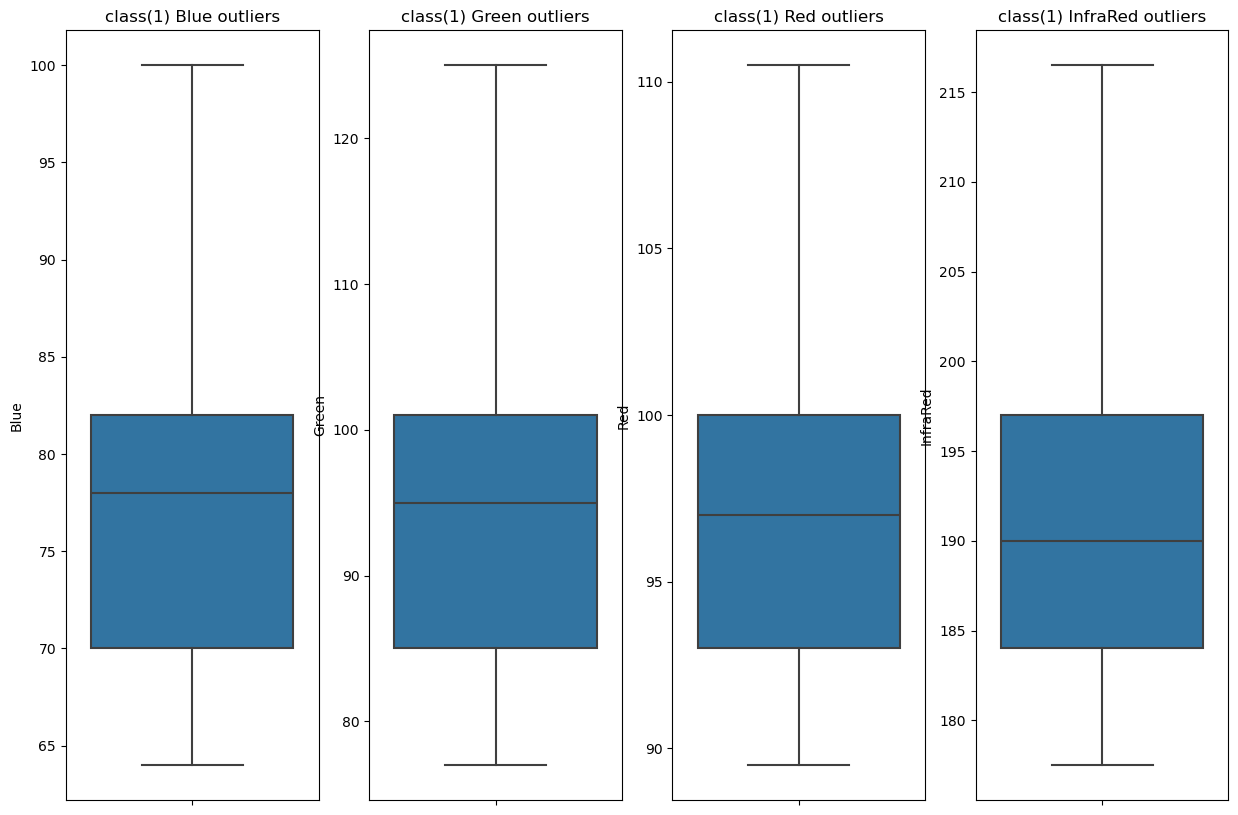

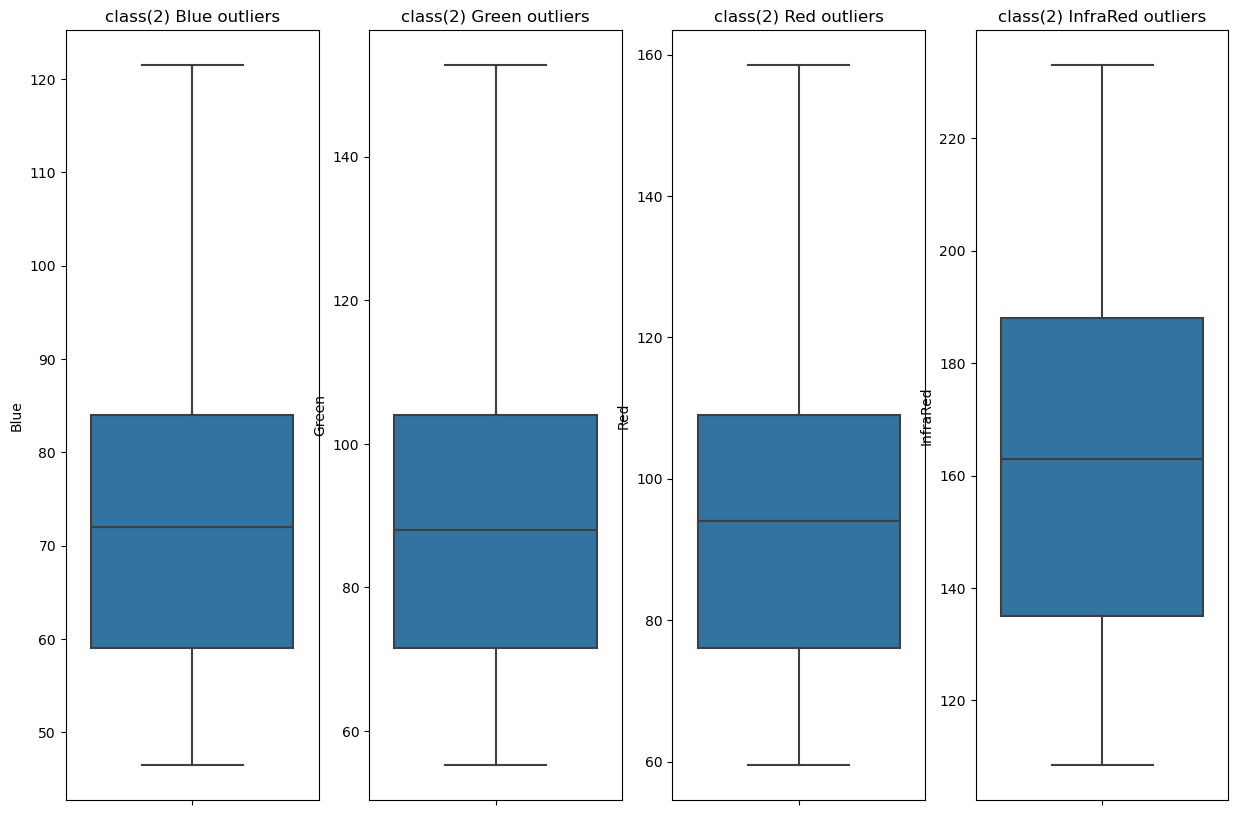

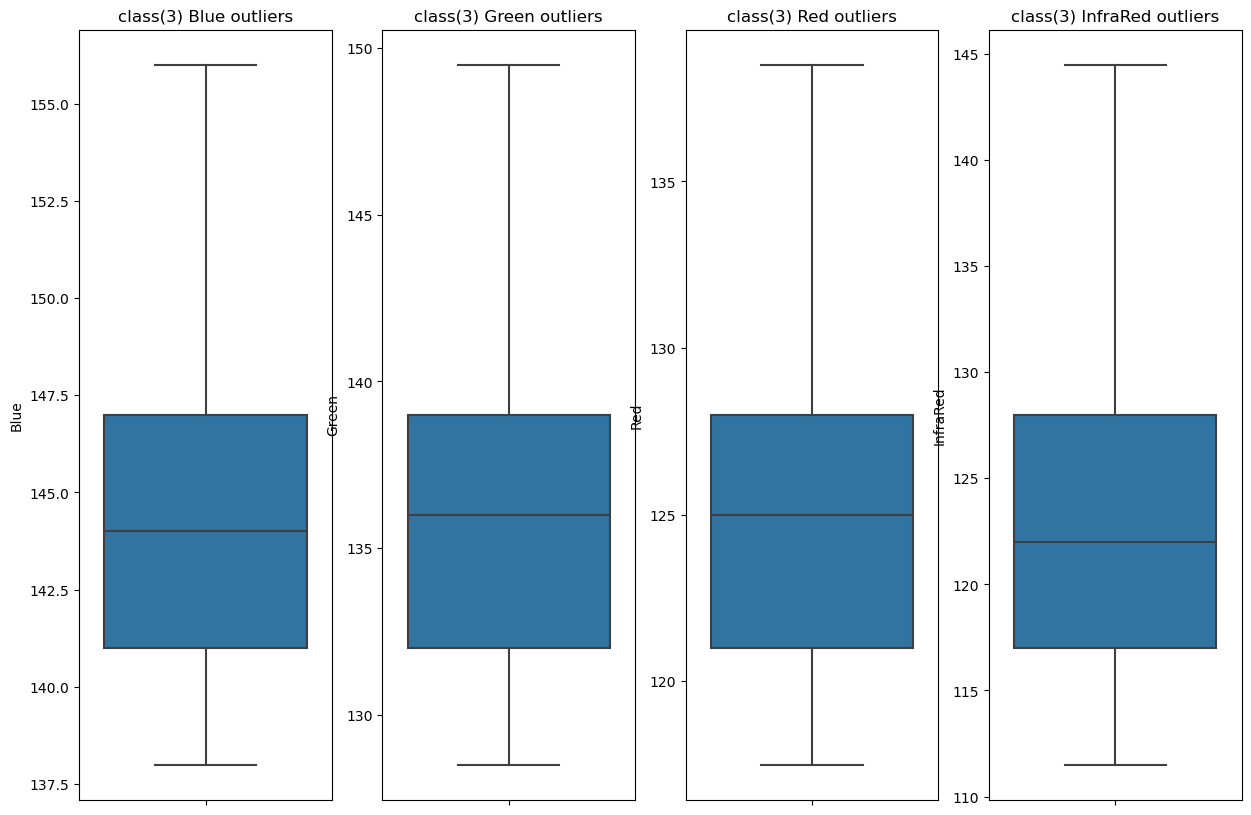

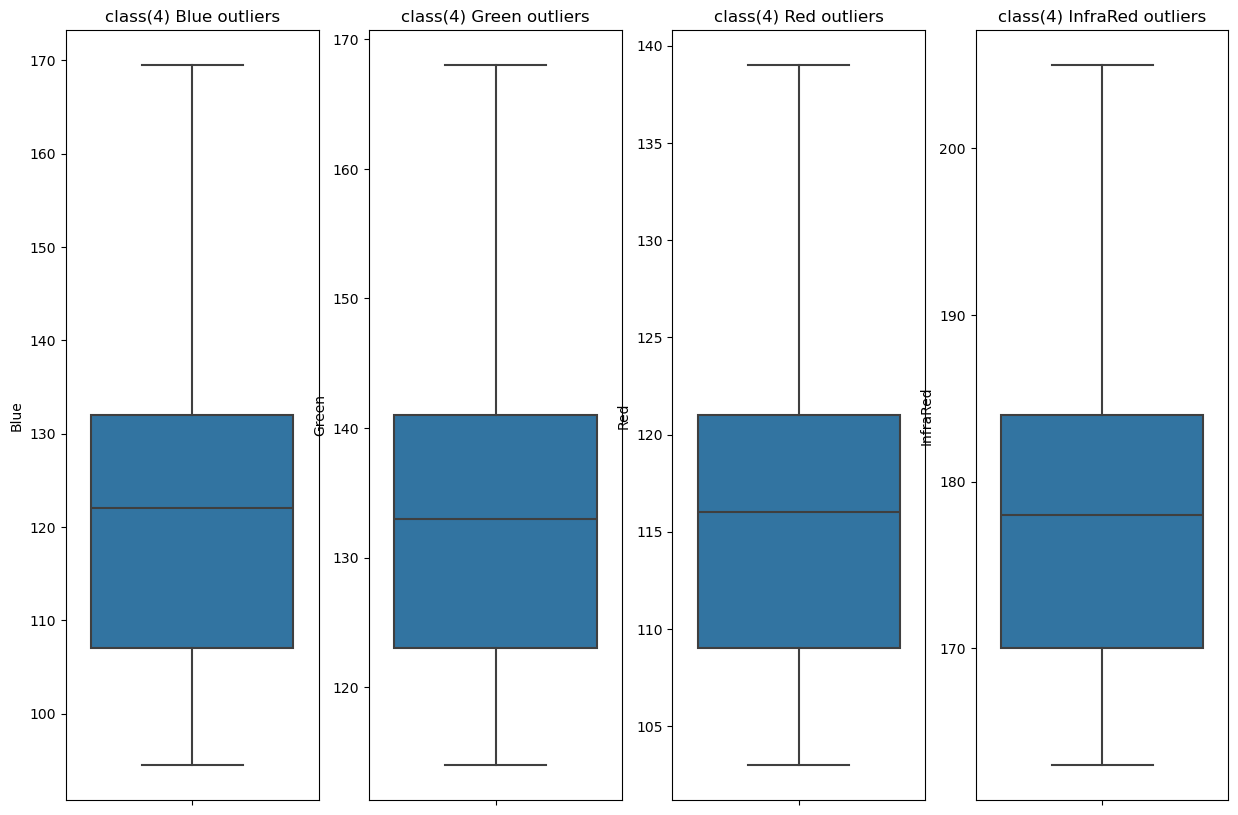

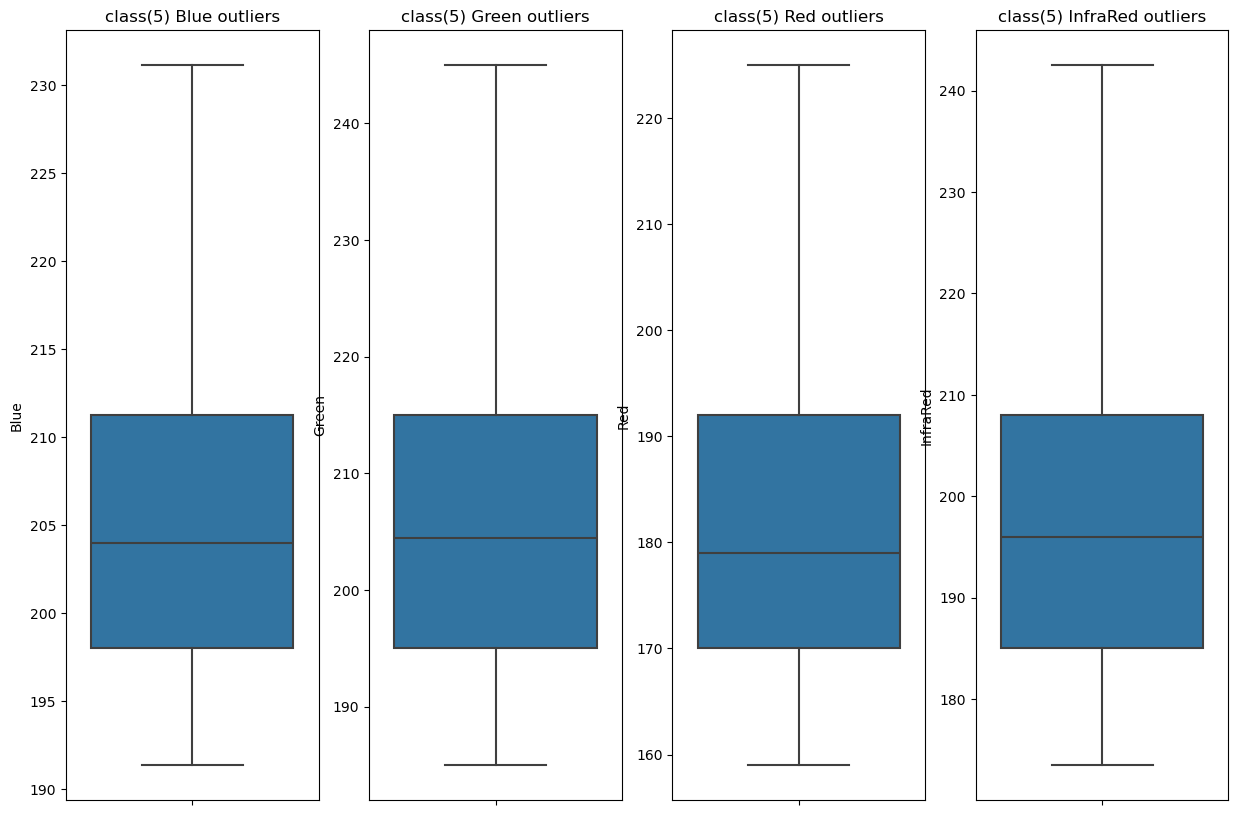

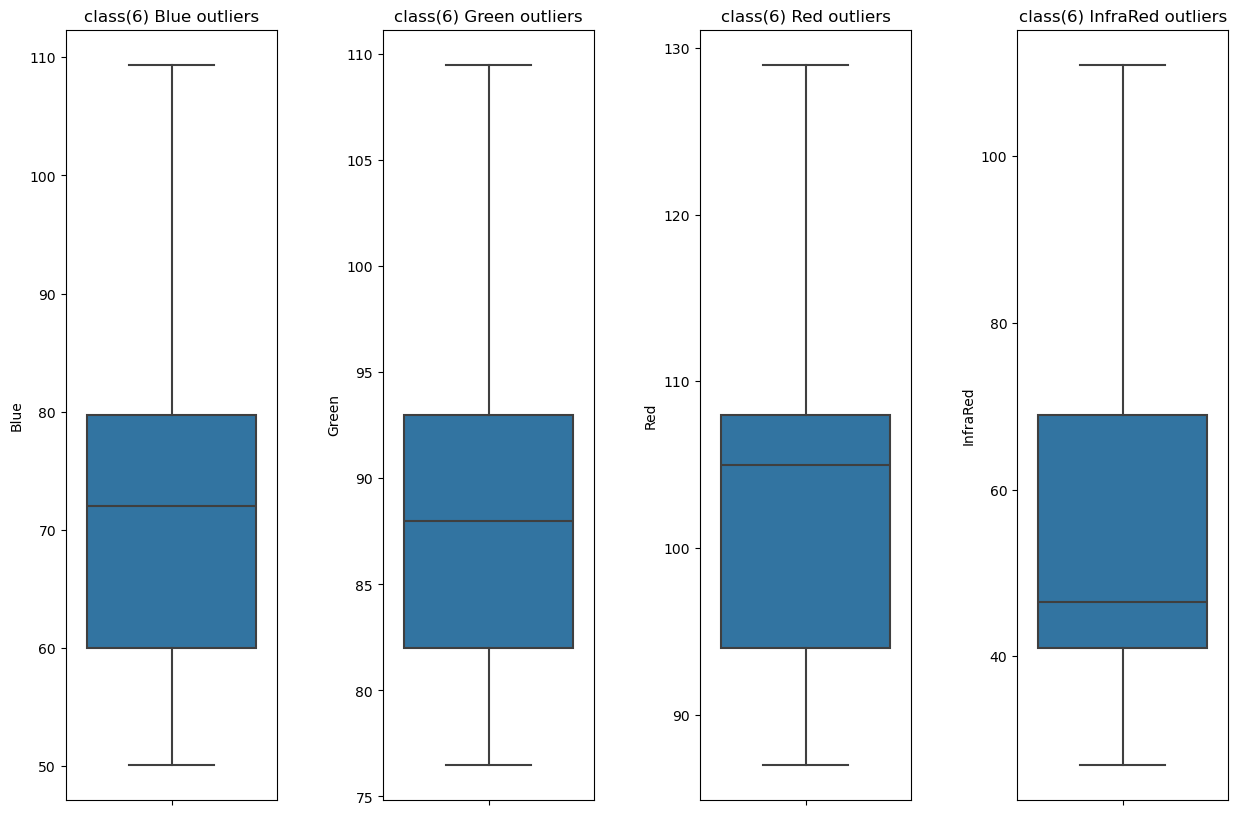

In [34]:
for j in class_values:
    df_class = df_outlier[df_outlier['Class']==j]
    plt.figure(figsize= (15,10))
    for i,column in enumerate (df_class.columns[:-1]):
        plt.subplot(1,4,i+1)
        sns.boxplot(y=column, data=df_class)
        plt.title("class(" + str(j) + ") " + column + " outliers")

plt.subplots_adjust(hspace= 0.50 , wspace=0.5)
plt.show()

### 7-1 Recheck for Duplicates

In [35]:
df_outlier.duplicated().sum()

135

In [36]:
# drop dublicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [37]:
# correlation matrix
for column in df_outlier.columns:
    df_outlier[column] = df_outlier[column].astype("uint8")
corr_matrix = df_outlier.corr()
corr_matrix

Blue     Green       Red  InfraRed     Class
Blue      1.000000  0.966642  0.919591  0.158643  0.508416
Green     0.966642  1.000000  0.955602  0.278998  0.503326
Red       0.919591  0.955602  1.000000  0.204769  0.507763
InfraRed  0.158643  0.278998  0.204769  1.000000 -0.466337
Class     0.508416  0.503326  0.507763 -0.466337  1.000000

## 8- Normalization

### 8.1- Data Spliting

In [38]:
x = df_outlier.iloc[:,:-1]
y = df_outlier.iloc[:,-1]
print("x")
print(x)
y = pd.DataFrame(y)
print("y")
print(y)

x
      Blue  Green  Red  InfraRed
0       78     98   97       195
1       78     98  100       194
2       79     97   99       193
3       82    100  101       191
4       80     97   99       189
...    ...    ...  ...       ...
1298    68     87  101        52
1299    66     88  101        51
1300    68     89  101        49
1301    68     89  101        52
1302    66     86  101        48

[3369 rows x 4 columns]
y
      Class
0         1
1         1
2         1
3         1
4         1
...     ...
1298      6
1299      6
1300      6
1301      6
1302      6

[3369 rows x 1 columns]


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, shuffle=True, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1,shuffle=True,random_state=42)
y_train

Class
1330      2
1146      6
1839      4
2816      1
2937      5
...     ...
1674      3
997       5
2815      1
2698      1
1227      6

[2728 rows x 1 columns]

In [40]:
# Check that all classes are represented 
print(f"y_train : {y_train.nunique()}")
print(f"y_val : {y_val.nunique()}")
print(f"y_Test : {y_test.nunique()}")

y_train : Class    6
dtype: int64
y_val : Class    6
dtype: int64
y_Test : Class    6
dtype: int64


### 8.2- Normalization

In [41]:
# Because the image is B-Bits so it's easier to just divide by 255 to normalize the data
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [42]:
x_train

Blue     Green       Red  InfraRed
1330  0.219608  0.239216  0.254902  0.423529
1146  0.286275  0.345098  0.415686  0.160784
1839  0.447059  0.533333  0.466667  0.752941
2816  0.294118  0.356863  0.376471  0.776471
2937  0.749020  0.725490  0.623529  0.678431
...        ...       ...       ...       ...
1674  0.545098  0.521569  0.470588  0.501961
997   0.894118  0.960784  0.819608  0.866667
2815  0.278431  0.352941  0.372549  0.788235
2698  0.298039  0.380392  0.384314  0.752941
1227  0.219608  0.341176  0.419608  0.196078

[2728 rows x 4 columns]

In [43]:
x_val

Blue     Green       Red  InfraRed
1861  0.427451  0.533333  0.474510  0.745098
142   0.392157  0.431373  0.411765  0.713725
1516  0.564706  0.541176  0.494118  0.474510
2831  0.278431  0.345098  0.372549  0.780392
3199  0.403922  0.501961  0.580392  0.898039
...        ...       ...       ...       ...
2699  0.321569  0.400000  0.392157  0.733333
1976  0.396078  0.454902  0.403922  0.682353
490   0.662745  0.658824  0.545098  0.752941
2081  0.498039  0.517647  0.466667  0.643137
2314  0.576471  0.537255  0.490196  0.501961

[304 rows x 4 columns]

In [44]:
x_test

Blue     Green       Red  InfraRed
1134  0.286275  0.352941  0.427451  0.152941
1335  0.180392  0.278431  0.274510  0.423529
2094  0.513725  0.541176  0.482353  0.639216
140   0.333333  0.407843  0.407843  0.752941
308   0.392157  0.462745  0.431373  0.847059
...        ...       ...       ...       ...
984   0.905882  0.937255  0.847059  0.827451
441   0.533333  0.564706  0.478431  0.678431
2060  0.478431  0.494118  0.450980  0.639216
1219  0.211765  0.298039  0.349020  0.160784
1267  0.427451  0.427451  0.505882  0.313725

[337 rows x 4 columns]

In [45]:
# the target column is already encoded but from 1 to 6
y_train

Class
1330      2
1146      6
1839      4
2816      1
2937      5
...     ...
1674      3
997       5
2815      1
2698      1
1227      6

[2728 rows x 1 columns]

### 8.3- Adjusting Label Encoding

**adjusting the label values to start from 0 to be suitable for Nueral Network**

In [46]:
y_train = y_train - 1
y_val = y_val - 1
y_test = y_test - 1
# Check that all classes are represented 
print(f"y_train : {y_train.nunique()}")
print(f"y_val : {y_val.nunique()}")
print(f"y_Test : {y_test.nunique()}")

y_train : Class    6
dtype: int64
y_val : Class    6
dtype: int64
y_Test : Class    6
dtype: int64


In [47]:
y_train

Class
1330      1
1146      5
1839      3
2816      0
2937      4
...     ...
1674      2
997       4
2815      0
2698      0
1227      5

[2728 rows x 1 columns]

# Part 3: Models Implementation

## 1- KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

tr_scores = []
val_scores = []

for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(x_train,y_train)
    
    y_train_pred = knn_model.predict(x_train)
    y_val_pred = knn_model.predict(x_val)
    
    train_acc = accuracy_score(y_train,y_train_pred)
    val_acc = accuracy_score(y_val,y_val_pred)
    
    tr_scores.append(train_acc)
    val_scores.append(val_acc)


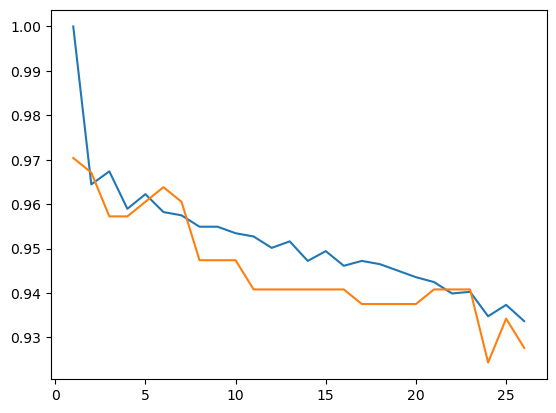

In [50]:
plt.plot(ks,tr_scores)
plt.plot(ks,val_scores)
plt.show()

**from the figure above k=3 is a good choice in terms of model accuracy and model fitting**

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3)  
    
knn_model.fit(x_train, y_train)

y_tr_pred = knn_model.predict(x_train)
y_val_pred = knn_model.predict(x_val)

knn_tr_acc = accuracy_score(y_train, y_tr_pred)
knn_val_acc = accuracy_score(y_val, y_val_pred)

print(knn_tr_acc)
print(knn_val_acc)

0.967375366568915
0.9572368421052632


In [52]:
knn_Fitting_Condition = "Good Fitting"

In [53]:
test_pred = knn_model.predict(x_test)
knn_test_acc = accuracy_score(y_test,test_pred)
print(knn_test_acc)

0.9317507418397626


## 2- Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [56]:
tr_pred = log_reg_model.predict(x_train)
val_pred = log_reg_model.predict(x_val)
log_reg_train_acc = accuracy_score(y_train, tr_pred) 
log_reg_val_acc = accuracy_score(y_val, val_pred)
print(log_reg_train_acc)
print(log_reg_train_acc)

0.8918621700879765
0.8918621700879765


In [57]:
test_pred = log_reg_model.predict(x_test)
log_reg_test_acc = accuracy_score(y_test,test_pred)

print(log_reg_test_acc)

0.884272997032641


## 3- Naive Bayes Model

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [60]:
tr_pred = nb_model.predict(x_train)
val_pred = nb_model.predict(x_val)

nb_tr_acc = accuracy_score(y_train, tr_pred)
nb_val_acc = accuracy_score(y_val, val_pred)

print(nb_tr_acc)
print(nb_val_acc)

0.9127565982404692
0.9243421052631579


In [61]:
test_pred = nb_model.predict(x_test)
nb_test_acc = accuracy_score(y_test,test_pred)
print(nb_test_acc)

0.8931750741839762


## 4- Decision Tree Model

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
depth = [1,2,3,4,5,6,7,8,9,10]

tr_scores = []
val_scores = []

for d in depth:
    dt_model = DecisionTreeClassifier(max_depth=d)
    
    dt_model.fit(x_train,y_train)
    
    tr_pred = dt_model.predict(x_train)
    val_pred = dt_model.predict(x_val)
    
    tr_acc = accuracy_score(y_train,tr_pred)
    val_acc = accuracy_score(y_val,val_pred)
    
    tr_scores.append(tr_acc)
    val_scores.append(val_acc)

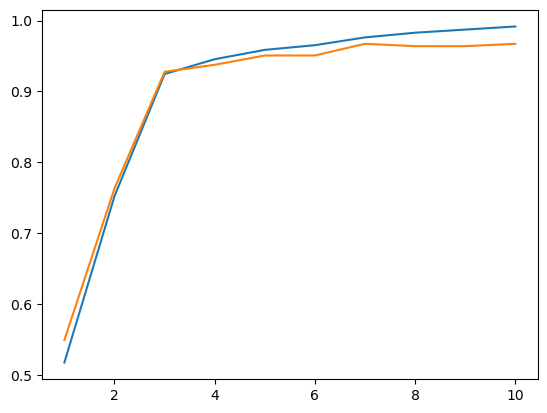

In [64]:
plt.plot(depth,tr_scores)
plt.plot(depth,val_scores)
plt.show()

**from the figure above max_depth=3 is a good choice in terms of model accuracy and model fitting**

In [65]:
dt_model = DecisionTreeClassifier(max_depth=3)
    
dt_model.fit(x_train,y_train)

tr_pred = dt_model.predict(x_train)
val_pred = dt_model.predict(x_val)

dt_tr_acc = accuracy_score(y_train,tr_pred)
dt_val_acc = accuracy_score(y_val,val_pred)

print(dt_tr_acc)
print(dt_val_acc)

0.9244868035190615
0.9276315789473685


In [66]:
test_pred = dt_model.predict(x_test)
dt_test_acc = accuracy_score(y_test,test_pred)
print(dt_test_acc)

0.887240356083086


## 5- Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

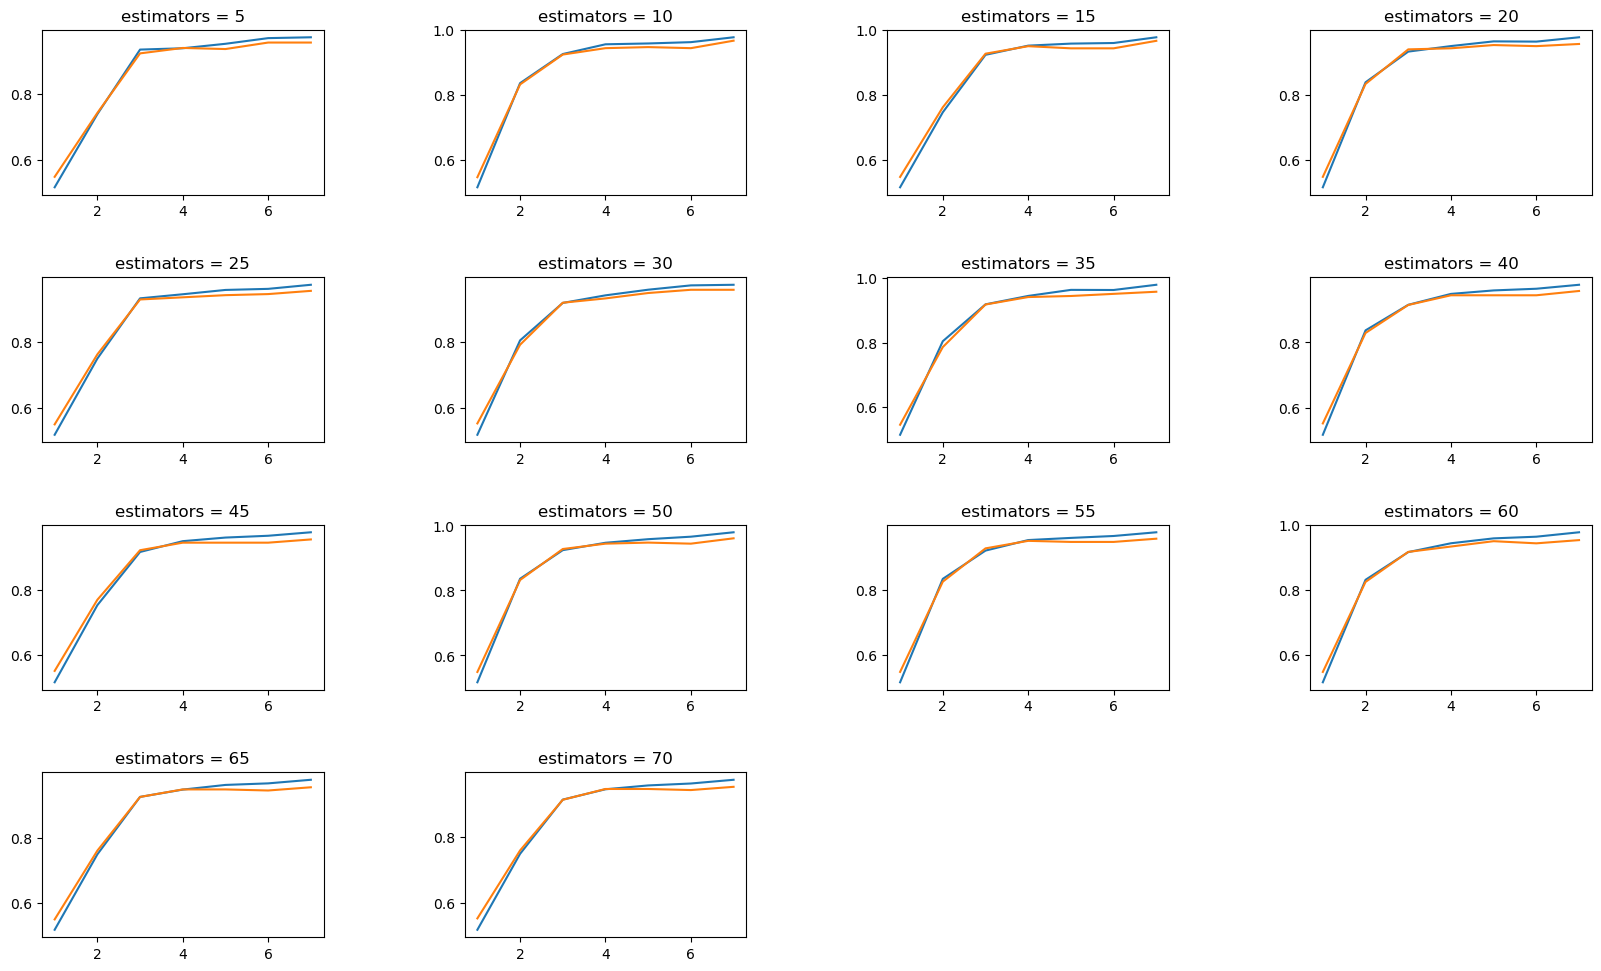

In [68]:
depth = [1,2,3,4,5,6,7]
estimators = [5,10,15,20,25,30,35,40,45,50,55,60,65,70]

plt.figure(figsize=(20,15))

for i,e in enumerate(estimators):
    
    tr_scores = []
    val_scores = []
    
    for d in depth:
                
        rf_model = RandomForestClassifier(max_depth=d, n_estimators=e)
    
        rf_model.fit(x_train,y_train)

        tr_pred = rf_model.predict(x_train)
        val_pred = rf_model.predict(x_val)

        tr_acc = accuracy_score(y_train,tr_pred)
        val_acc = accuracy_score(y_val,val_pred)

        tr_scores.append(tr_acc)
        val_scores.append(val_acc)
        
    plt.subplot(5,4,i+1)
    plt.title(f"estimators = {e}")
    plt.plot(depth,tr_scores)
    plt.plot(depth,val_scores)

plt.subplots_adjust(hspace=0.5,wspace=0.5)    
plt.show()


**from the figure above max_depth=3 wit estimators = 70 is a good choice**

In [69]:
rf_model = RandomForestClassifier(max_depth=3, n_estimators=70)
    
rf_model.fit(x_train,y_train)

tr_pred = rf_model.predict(x_train)
val_pred = rf_model.predict(x_val)

rf_tr_acc = accuracy_score(y_train,tr_pred)
rf_val_acc = accuracy_score(y_val,val_pred)

print(rf_tr_acc)
print(rf_val_acc)

0.9175219941348973
0.9210526315789473


In [70]:
test_pred = rf_model.predict(x_test)
rf_test_acc = accuracy_score(y_test,test_pred)
print(rf_test_acc)

0.8813056379821959


## 6- XGboost Model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

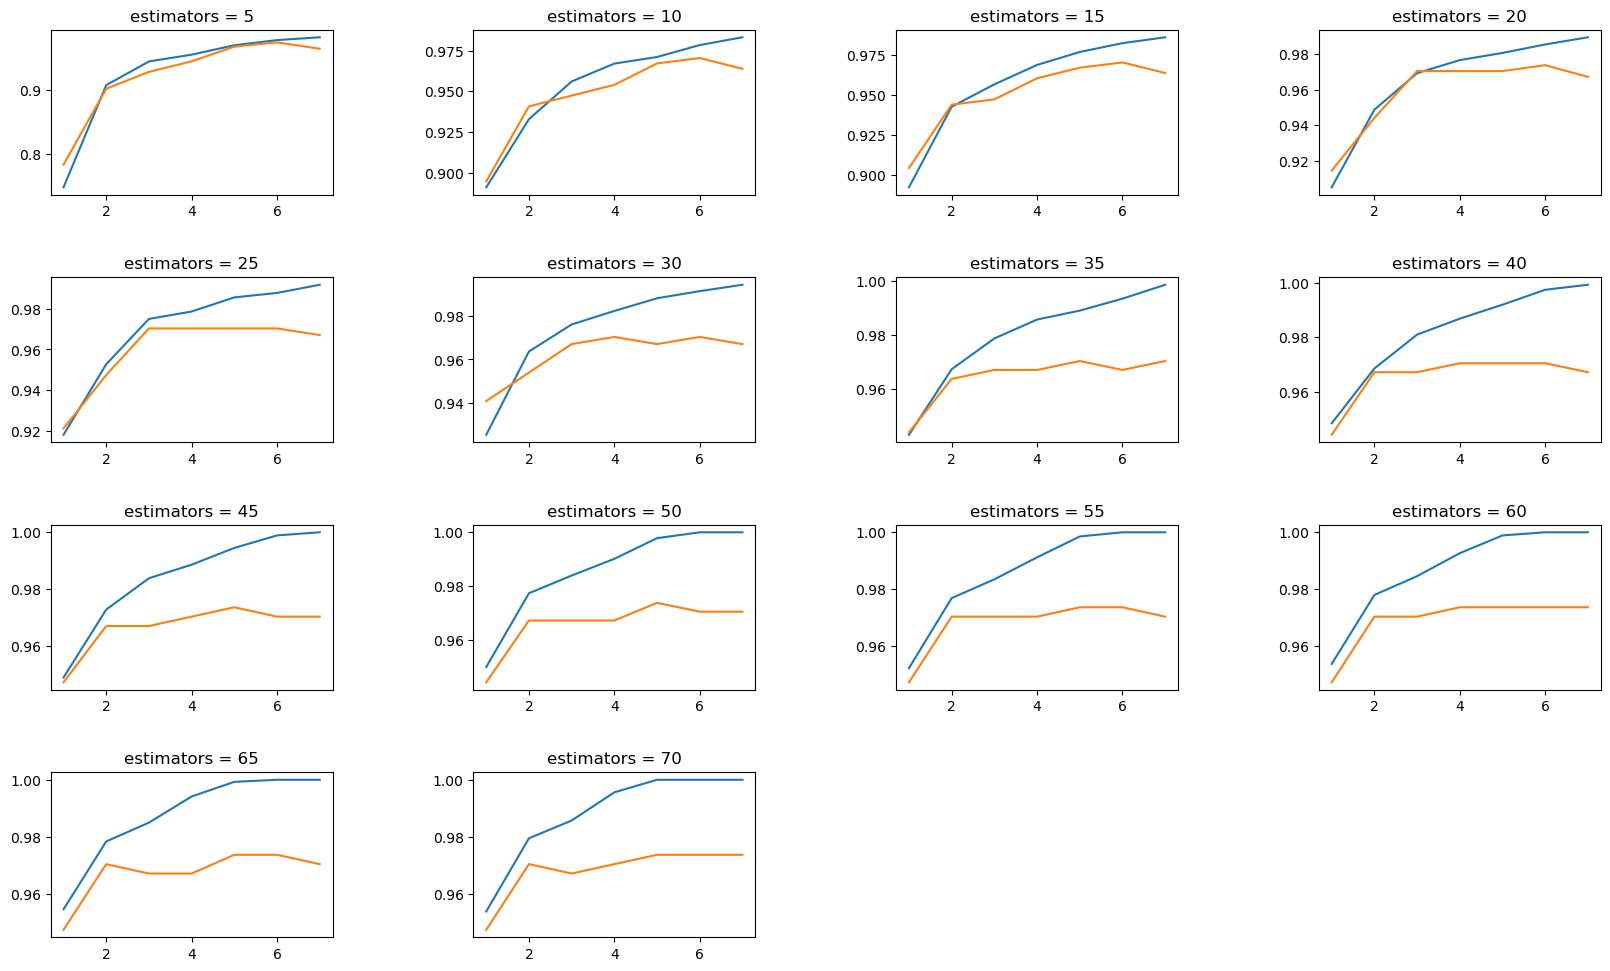

In [72]:
depth = [1,2,3,4,5,6,7]
estimators = [5,10,15,20,25,30,35,40,45,50,55,60,65,70]

plt.figure(figsize=(20,15))

for i,e in enumerate(estimators):
   
    tr_scores = []
    val_scores = []

    for d in depth:
                
        gbc_model = GradientBoostingClassifier(max_depth=d, n_estimators=e)
    
        gbc_model.fit(x_train,y_train)

        tr_pred = gbc_model.predict(x_train)
        val_pred = gbc_model.predict(x_val)

        tr_acc = accuracy_score(y_train,tr_pred)
        val_acc = accuracy_score(y_val,val_pred)

        tr_scores.append(tr_acc)
        val_scores.append(val_acc)
        
    plt.subplot(5,4,i+1)
    plt.title(f"estimators = {e}")
    plt.plot(depth,tr_scores)
    plt.plot(depth,val_scores)

plt.subplots_adjust(hspace=0.5,wspace=0.5)    
plt.show()

**from the figure above max_depth=3 wit estimators = 5 is a good choice**

In [73]:
gbc_model = GradientBoostingClassifier(max_depth=3, n_estimators=5)
    
gbc_model.fit(x_train,y_train)

tr_pred = gbc_model.predict(x_train)
val_pred = gbc_model.predict(x_val)

gbc_tr_acc = accuracy_score(y_train,tr_pred)
gbc_val_acc = accuracy_score(y_val,val_pred)

print(gbc_tr_acc)
print(gbc_val_acc)

0.9439149560117303
0.9276315789473685


In [74]:
test_pred = gbc_model.predict(x_test)
gbc_test_acc = accuracy_score(y_test,test_pred)
print(gbc_test_acc)

0.9169139465875371


## 7- Support Vector Machine (SVM)

In [75]:
from sklearn.svm import SVC

In [76]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [77]:
tr_pred = svm_model.predict(x_train)
val_pred = svm_model.predict(x_val)

svm_tr_acc = accuracy_score(y_train,tr_pred)
svm_val_acc = accuracy_score(y_val,val_pred)

print(svm_tr_acc)
print(svm_val_acc)

0.9307184750733137
0.9276315789473685


In [78]:
test_pred = svm_model.predict(x_test)
svm_test_acc = accuracy_score(y_test,test_pred)
print(svm_test_acc)

0.913946587537092


In [79]:

df_results = pd.DataFrame(np.random.randn(7,5),columns=["Model Name","Train_acc","Val_acc","Fitting_Condition","Test_acc"])
#KNN Model
df_results.iloc[0] = ["KNN", knn_tr_acc,knn_val_acc,knn_tr_acc-knn_val_acc,knn_test_acc]
#Logistic Regression Model
df_results.iloc[1] = ["Logistic Regression",log_reg_train_acc,log_reg_val_acc,log_reg_train_acc-log_reg_val_acc,log_reg_test_acc]
# Naive Bayes Model
df_results.iloc[2] = ["Naive Bayes",nb_tr_acc,nb_val_acc,nb_tr_acc-nb_val_acc,nb_test_acc]
# Decision Tree Model
df_results.iloc[3] = ["Decision Tree",dt_tr_acc,dt_val_acc,dt_tr_acc-dt_val_acc,dt_test_acc]
# Random Forest Model
df_results.iloc[4] = ["Random Forest",rf_tr_acc,rf_val_acc,rf_tr_acc-rf_val_acc,rf_test_acc]
# XGboost Model
df_results.iloc[5] = ["XGboost",gbc_tr_acc,gbc_val_acc,gbc_tr_acc-gbc_val_acc,gbc_test_acc]
# SVM
df_results.iloc[6] = ["SVM",svm_tr_acc,svm_val_acc,svm_tr_acc-svm_val_acc,svm_test_acc]

df_results

Model Name  Train_acc   Val_acc  Fitting_Condition  Test_acc
0                  KNN   0.967375  0.957237           0.010139  0.931751
1  Logistic Regression   0.891862  0.891447           0.000415  0.884273
2          Naive Bayes   0.912757  0.924342          -0.011586  0.893175
3        Decision Tree   0.924487  0.927632          -0.003145  0.887240
4        Random Forest   0.917522  0.921053          -0.003531  0.881306
5              XGboost   0.943915  0.927632           0.016283  0.916914
6                  SVM   0.930718  0.927632           0.003087  0.913947

In [80]:
help(df_results.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis: 'Axis' = 0, ascending=True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    

In [81]:
df_result_sort = df_results.sort_values(["Train_acc","Fitting_Condition","Test_acc"],axis=0, ascending=False)
df_result_sort

Model Name  Train_acc   Val_acc  Fitting_Condition  Test_acc
0                  KNN   0.967375  0.957237           0.010139  0.931751
5              XGboost   0.943915  0.927632           0.016283  0.916914
6                  SVM   0.930718  0.927632           0.003087  0.913947
3        Decision Tree   0.924487  0.927632          -0.003145  0.887240
4        Random Forest   0.917522  0.921053          -0.003531  0.881306
2          Naive Bayes   0.912757  0.924342          -0.011586  0.893175
1  Logistic Regression   0.891862  0.891447           0.000415  0.884273

**From the Table above it's better to use KNN model for the classification**

## 8- Appling the selected model on the whole image

### 8.1- Reshaping the image

In [82]:
img_reshape = img.reshape((img.shape[0] * img.shape[1],4))
img_reshape.shape

(6592677, 4)

**Rescaling the image data**

In [83]:
img_reshape= img_reshape /255
img_reshape

array([[0.37254902, 0.45882353, 0.41568627, 0.7372549 ],
       [0.42352941, 0.51764706, 0.45882353, 0.76470588],
       [0.4745098 , 0.57254902, 0.49803922, 0.79215686],
       ...,
       [0.29803922, 0.36470588, 0.34117647, 0.65490196],
       [0.31764706, 0.42352941, 0.4       , 0.7372549 ],
       [0.34117647, 0.44705882, 0.41960784, 0.78431373]])

### 8.2- Getting classified image usig KNN model

In [84]:
img_KNN_class = knn_model.predict(img_reshape)

In [85]:
img_KNN_class.shape

(6592677,)

**Readjusting the Class Values**

In [86]:
# Readjusting the class values to start from 1 to 6 as the standard coding 
img_KNN_class = img_KNN_class + 1
img_KNN_class

array([4, 4, 4, ..., 2, 1, 1], dtype=uint8)

**Reshape the image**

In [87]:
img_KNN_class_reshape = img_KNN_class.reshape(img.shape[0],img.shape[1],1)
img_KNN_class_reshape.shape

(2337, 2821, 1)

**Displaying the classified image**

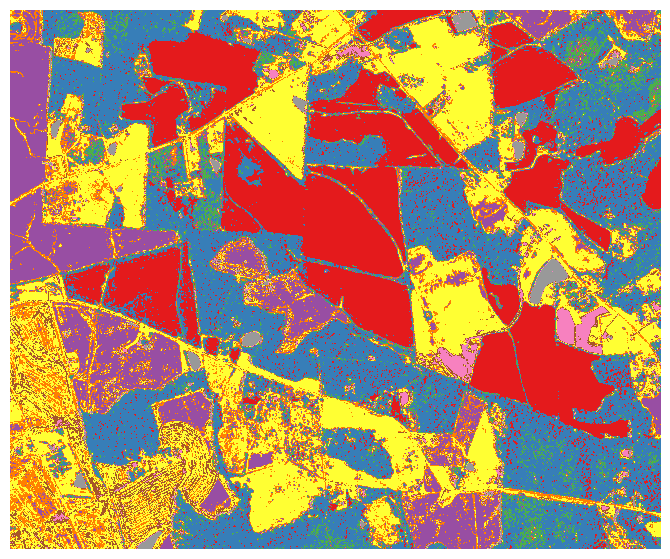

In [88]:
# Displaying the classified image
plt.figure(figsize=(10,7))
plt.imshow(img_KNN_class_reshape,aspect="equal", cmap="Set1")
plt.axis("off")
plt.show()

### 8.3- Getting classified image using XGboost model

In [89]:
img_XGboost_class = gbc_model.predict(img_reshape)

**Readjusting the Class Values**

In [90]:
# Readjusting the class values to start from 1 to 6 as the standard coding 
img_XGboost_class = img_XGboost_class + 1
img_XGboost_class

array([4, 4, 4, ..., 2, 1, 4], dtype=uint8)

**Reshape the image**

In [91]:
img_XGboost_class_reshape = img_XGboost_class.reshape(img.shape[0],img.shape[1],1)
img_XGboost_class_reshape.shape

(2337, 2821, 1)

**Displaying the classified image**

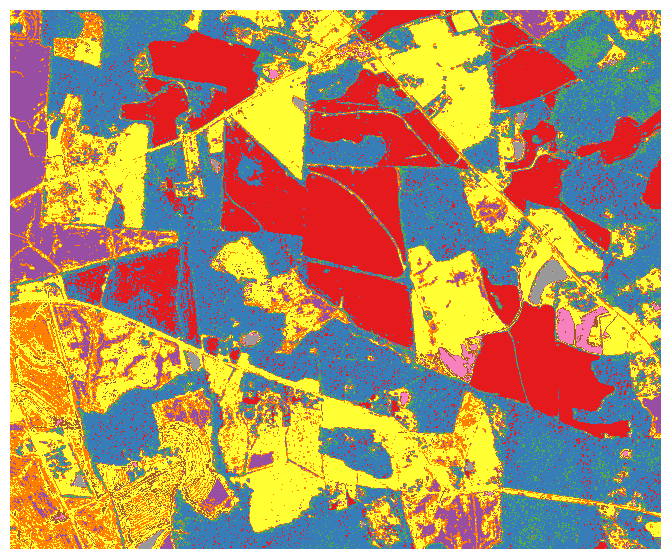

In [92]:
# Displaying the classified image
plt.figure(figsize=(10,7))
plt.imshow(img_XGboost_class_reshape,aspect="equal", cmap="Set1")
plt.axis("off")
plt.show()

### 8.4- Getting classified image using SVM model

In [93]:
img_SVM_class = svm_model.predict(img_reshape)

**Readjusting the Class Values**

In [94]:
# Readjusting the class values to start from 1 to 6 as the standard coding 
img_SVM_class = img_SVM_class + 1
img_SVM_class

array([4, 4, 4, ..., 1, 1, 1], dtype=uint8)

**Reshape the image**

In [95]:
img_SVM_class_reshape = img_SVM_class.reshape(img.shape[0],img.shape[1],1)
img_SVM_class_reshape.shape

(2337, 2821, 1)

**Displaying the classified image**

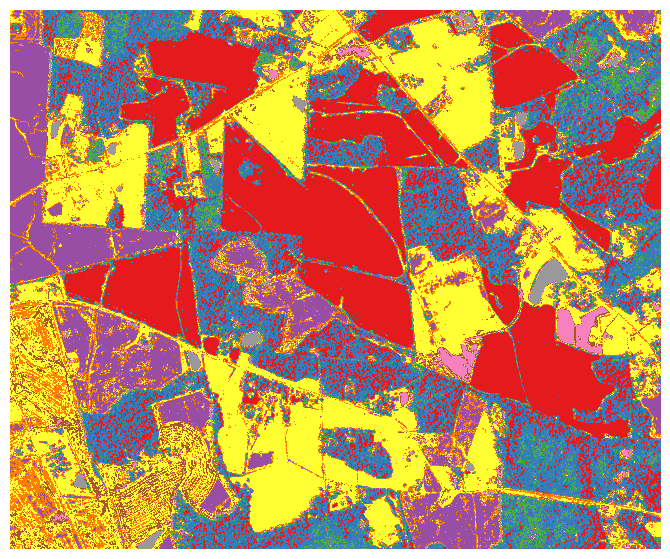

In [96]:
# Displaying the classified image
plt.figure(figsize=(10,7))
plt.imshow(img_SVM_class_reshape,aspect="equal", cmap="Set1")
plt.axis("off")
plt.show()

### 8.5- Getting classified image using Random Forest model

In [97]:
img_RF_class = rf_model.predict(img_reshape)

**Readjusting the Class Values**

In [98]:
# Readjusting the class values to start from 1 to 6 as the standard coding 
img_RF_class = img_RF_class + 1
img_RF_class

array([4, 4, 4, ..., 2, 1, 4], dtype=uint8)

**Reshape the image**

In [99]:
img_RF_class_reshape = img_RF_class.reshape(img.shape[0],img.shape[1],1)
img_RF_class_reshape.shape

(2337, 2821, 1)

**Displaying the classified image**

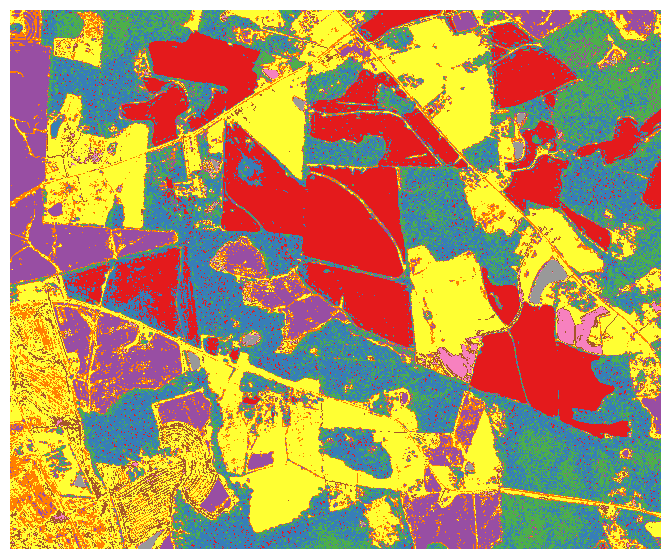

In [100]:
# Displaying the classified image
plt.figure(figsize=(10,7))
plt.imshow(img_RF_class_reshape,aspect="equal", cmap="Set1")
plt.axis("off")
plt.show()

# Part 4: Deep Learning Model

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization

In [102]:
model = Sequential()

In [103]:
model.add(Input(x_train.shape[1]))
#model.add(Dense(8,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(8,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4,activation="relu"))
model.add(BatchNormalization())
#model.add(Dense(4,activation="relu"))
model.add(Dense(6,activation="softmax"))

In [104]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [105]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam(learning_rate=.001))

In [106]:
# Check that all classes are represented 
print(f"y_train : {y_train.nunique()}")
print(f"y_val : {y_val.nunique()}")
print(f"y_Test : {y_test.nunique()}")
y_train

y_train : Class    6
dtype: int64
y_val : Class    6
dtype: int64
y_Test : Class    6
dtype: int64


Class
1330      1
1146      5
1839      3
2816      0
2937      4
...     ...
1674      2
997       4
2815      0
2698      0
1227      5

[2728 rows x 1 columns]

In [107]:
model.fit(x_train,y_train, epochs=300, validation_data=[x_val,y_val])

Epoch 1/300
86/86 [==============================] - 2s 8ms/step - loss: 1.5154 - accuracy: 0.3801 - val_loss: 1.7196 - val_accuracy: 0.2763
Epoch 2/300
86/86 [==============================] - 0s 3ms/step - loss: 0.9824 - accuracy: 0.7331 - val_loss: 1.6077 - val_accuracy: 0.2796
Epoch 3/300
86/86 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.7980 - val_loss: 1.4131 - val_accuracy: 0.4243
Epoch 4/300
86/86 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.8270 - val_loss: 1.0650 - val_accuracy: 0.6283
Epoch 5/300
86/86 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.8640 - val_loss: 0.7886 - val_accuracy: 0.8487
Epoch 6/300
86/86 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.8926 - val_loss: 0.6128 - val_accuracy: 0.8816
Epoch 7/300
86/86 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.9036 - val_loss: 0.3866 - val_accuracy: 0.9112
Epoch 8/300
8

In [108]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9228


[0.23162753880023956, 0.922848641872406]

### Getting classified image

In [109]:
img_pred = model.predict(img_reshape)

206022/206022 [==============================] - 442s 2ms/step


In [110]:
img_pred.shape

(6592677, 6)

In [111]:
img_code_pred = np.argmax(img_pred, axis=1)
img_code_pred.shape

(6592677,)

**adjusting the Class Values**

In [112]:
# Readjusting the class values to start from 1 to 6 as the standard coding 
img_code_pred = img_code_pred + 1
img_code_pred

array([4, 4, 4, ..., 2, 1, 1], dtype=int64)

**Reshape the image**

In [113]:
img_code_pred = img_code_pred.reshape(img.shape[0],img.shape[1],1)
img_code_pred.shape

(2337, 2821, 1)

**Displaying the classified image**

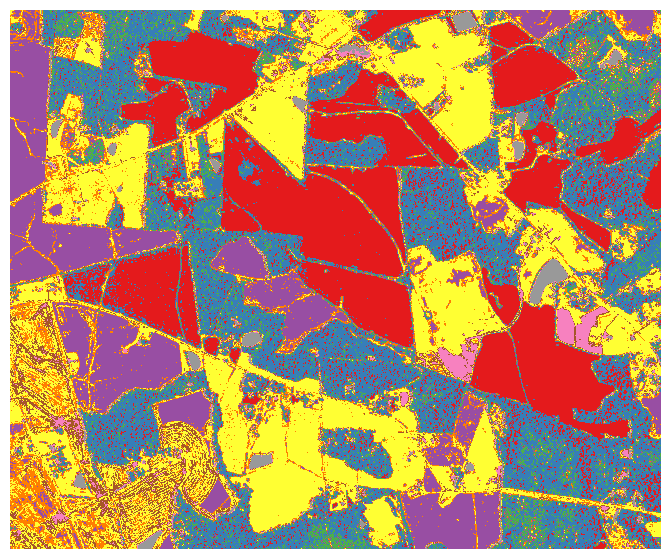

In [114]:
# Displaying the classified image
plt.figure(figsize=(10,7))
plt.imshow(img_code_pred,aspect="equal", cmap="Set1")
plt.axis("off")
plt.show()

# Part 5: Conclusion

**Plotting the selected model to study which are the best models**

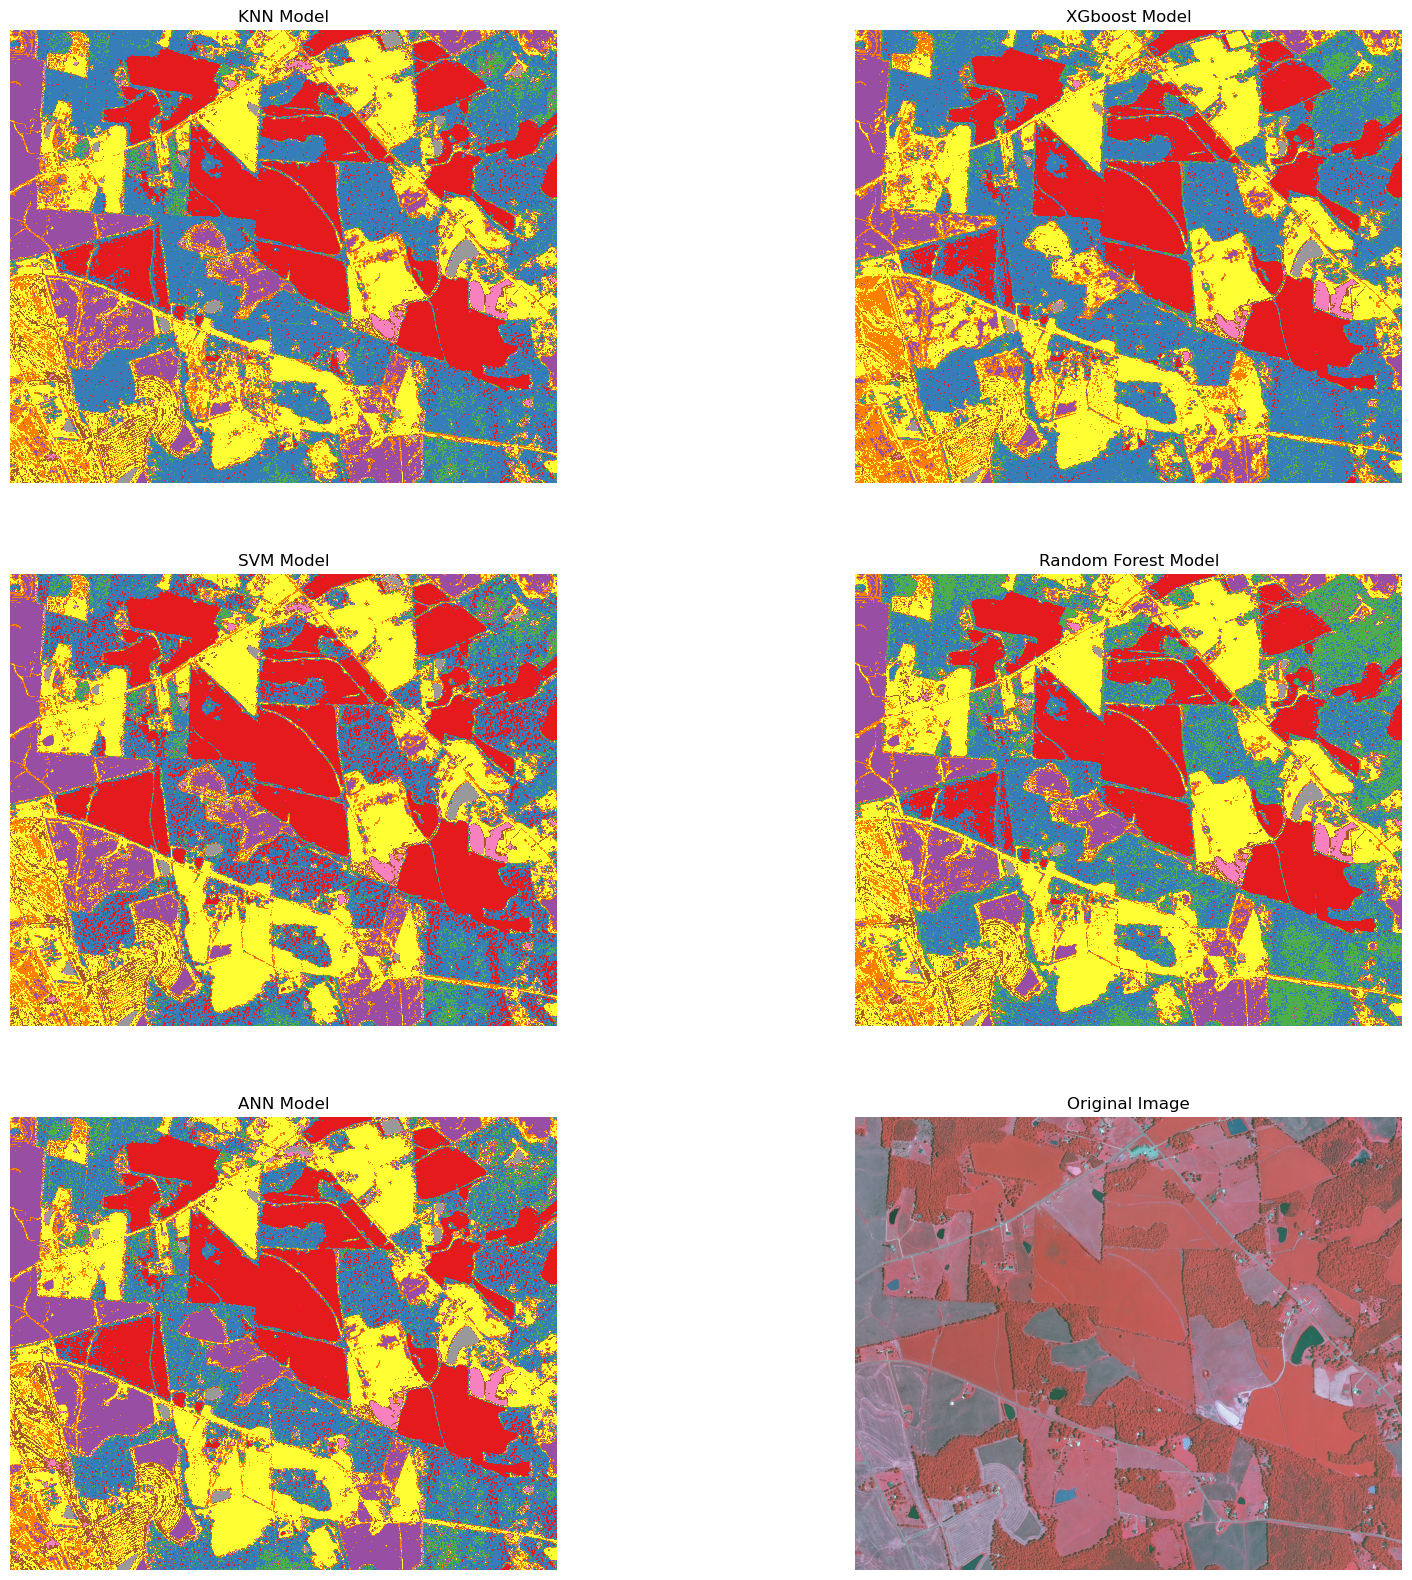

In [129]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title("KNN Model")
plt.axis("off")
plt.imshow(img_KNN_class_reshape,aspect="equal", cmap="Set1")
plt.subplot(3,2,2)
plt.title("XGboost Model")
plt.axis("off")
plt.imshow(img_XGboost_class_reshape,aspect="equal", cmap="Set1")
plt.subplot(3,2,3)
plt.title("SVM Model")
plt.axis("off")
plt.imshow(img_SVM_class_reshape,aspect="equal", cmap="Set1")
plt.subplot(3,2,4)
plt.title("Random Forest Model")
plt.axis("off")
plt.imshow(img_RF_class_reshape,aspect="equal", cmap="Set1")
plt.subplot(3,2,5)
plt.title("ANN Model")
plt.axis("off")
plt.imshow(img_code_pred,aspect="equal", cmap="Set1")
plt.subplot(3,2,6)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img[:,:,-1:0:-1],aspect="equal")

plt.show()

**Note: the good classification results represents hemogenous colored parcel without odd points (pixels)**

**the best classification Models are:**
- KNN
- ANN
- Random Forest
    